### 1.0 Data Exploration as Story Telling <a id='2.2_Introduction'></a>

## 1.1 Introduction <a id='2.2_Introduction'></a>

This dataset consist of several CSV files that contain number of geometric features of thousands of channel holes fabricated at nano-meter dimensions on a semconductor substrate. The data has tow parts 
1. Original features i.e. the geometric features are measured from image data that are unprocessed, 
2. Enhanced features i.e. geometric features are collected from processed images. 


Each image (of the same region) is acquired three times and the variation in geometric measurements of the same channel hole in three different images provide a measurement precision.
The customer wants to know the best protocol to achive optimal precision. There are four possibilities.
1. Class 1: Original/unprocessed image features and measurements on actual shape of the channel holes
2. Class 2: Enhanced/processed image features and measurement on actual shape of the channel holes

Exploring information on the feature files extracted from fitted geometric shapes to the channel holes is a similar repittition of the exercise and hence we are not detailing it here.

In the data-wrangling step we have already completed collecting data, organizing it, and making sure it's well defined. Some data cleaning  and data exploration was also done. In the exploratory data analysis step, we will explore the features, inter relationship between features by plotting the feature values and fitting standard models.

##### Example Images

             ORIGINAL                 ENHANCED


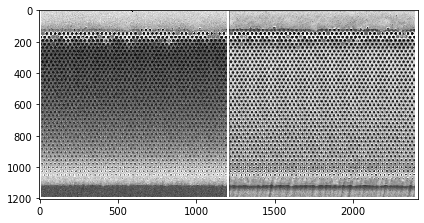

In [37]:
import skimage.io
import matplotlib.pyplot as plt
img = skimage.io.imread(r"C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\Capture-1.jpg")
skimage.io.imshow(img)
print("             ORIGINAL                 ENHANCED")
plt.show()

In [1]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import glob
import copy
import string

## 1.3 Objectives<a id='2.4_Objectives'></a>

* Plot distribution of the features as histograms and note the files that doesn't conform to the expected distribution
* Scatter plot features against one another to understand, highly correlated features
* Decide which (can be more than one) is suitable feature(s) to be called as critical dimension

## 1.4 Explore The Data:  <a id='2.5_Load_The_Ski_Resort_Data'></a>

In [2]:
fold =r'C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\Proposal01_ExampleData\Metrology\wrangled_data\original'

#There are three measurements for each channel hole using three images
# i.e. the first file in files_1 list below, files_2 list below and files_3 list below form a triplicate measurements
# from which precision in the form of standard deviation of measurements for a same channel hole as to be calculated.

ofiles=[]

fx1=[]
fx2=[]
fx3=[]

for file in glob.glob(fold + r"\*_0.csv"):
        fx1.append(file)
for file in glob.glob(fold + r"\*_1.csv"):
        fx2.append(file)
for file in glob.glob(fold + r"\*_2.csv"):
        fx3.append(file)

ofiles.append(fx1);
ofiles.append(fx2);
ofiles.append(fx3);

original files are loaded and same number of triplicates are present

In [3]:
# the supplied CSV data file is the raw_data directory
# get data file names
fold =r'C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\Proposal01_ExampleData\Metrology\wrangled_data\enhanced'

#There are three measurements for each channel hole using three images
# i.e. the first file in files_1 list below, files_2 list below and files_3 list below form a triplicate measurements
# from which precision in the form of standard deviation of measurements for a same channel hole as to be calculated.

efiles=[]

fx1=[]
fx2=[]
fx3=[]

for file in glob.glob(fold + r"\*_0.csv"):
        fx1.append(file)
for file in glob.glob(fold + r"\*_1.csv"):
        fx2.append(file)
for file in glob.glob(fold + r"\*_2.csv"):
        fx3.append(file)

efiles.append(fx1);
efiles.append(fx2);
efiles.append(fx3);


Enhanced data files are loaded and same number of triplicates are present

In [4]:
dfx = [] # data frame of frame of frames (for original data)

for fx in range (0, len(ofiles)):
    dfl=[]
    for file in ofiles[fx]:
        df = pd.read_csv(file, header=None)
        dfl.append(df)
    dfx.append(dfl)


Equal number of rows in all the files means we have done correct data wrangling and the channel holes that are not in triplicate measurements are all removed

In [5]:
dfy = [] # data frame of frame of frames (for enhanced data)

for fx in range (0, len(efiles)):
    dfl=[]
    for file in efiles[fx]:
        df = pd.read_csv(file, header=None)
        dfl.append(df)
    dfy.append(dfl)


#### Get the column labelling right

In [6]:
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        dfx[f][d] = dfx[f][d].dropna(axis='columns')
header_row=0
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        dfx[f][d].columns = dfx[f][d].iloc[header_row]
        dfx[f][d] = dfx[f][d].drop(dfx[f][d].index[header_row])
        


In [7]:
for f in range(0, len(dfy)):
    for d in range(0, len(dfy[f])):
        dfy[f][d] = dfy[f][d].dropna(axis='columns')
header_row=0
for f in range(0, len(dfy)):
    for d in range(0, len(dfy[f])):
        dfy[f][d].columns = dfy[f][d].iloc[header_row]
        dfy[f][d] = dfy[f][d].drop(dfy[f][d].index[header_row])
        

In [13]:
dfx[0][0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 1 to 760
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   file_name             760 non-null    object
 1   label                 760 non-null    object
 2   location (X_Y)        760 non-null    object
 3   area                  760 non-null    object
 4   area_fitted           760 non-null    object
 5   perimeter             760 non-null    object
 6   perimeter_Fitted      760 non-null    object
 7   areaEnclosingCircle   760 non-null    object
 8   areaFitEllipse        760 non-null    object
 9   areaMinAreaRectangle  760 non-null    object
 10  eccentricity          760 non-null    object
 11  orientation           760 non-null    object
 12  convexity             760 non-null    object
 13  0degDiam              760 non-null    object
 14  45degDiam             760 non-null    object
 15  90degDiam             760 non-null    ob

#### so we must convert object to numeric

In [8]:
dfl = (dfx[0][0].columns)
dfl0=dfl[3:len(dfl)]
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        for fname in dfl0:
            dfx[f][d][fname] = pd.to_numeric(dfx[f][d][fname], errors='coerce')


In [9]:
dfl = (dfy[0][0].columns)
dfl0=dfl[3:len(dfl)]
for f in range(0, len(dfy)):
    for d in range(0, len(dfy[f])):
        for fname in dfl0:
            dfy[f][d][fname] = pd.to_numeric(dfy[f][d][fname], errors='coerce')


Now we have a list dfx that contains 3 lists of dataframes of the wrangled features from original images
dfy is a list containing 3 lists of dataframes of the wrangles features from enhanced images

## 1.5 Let us explore the frequency distribution of each feature <a id='2.6_Explore_The_Data'></a>

### 1.5.1 Create a histogram plot for each feature distribution <a id='2.6.1_Find_Your_Resort_Of_Interest'></a>

#### Let us calculate some parameters and plot bunch of triplicate measurements in consequtive three rows

c:\users\umesh adiga\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


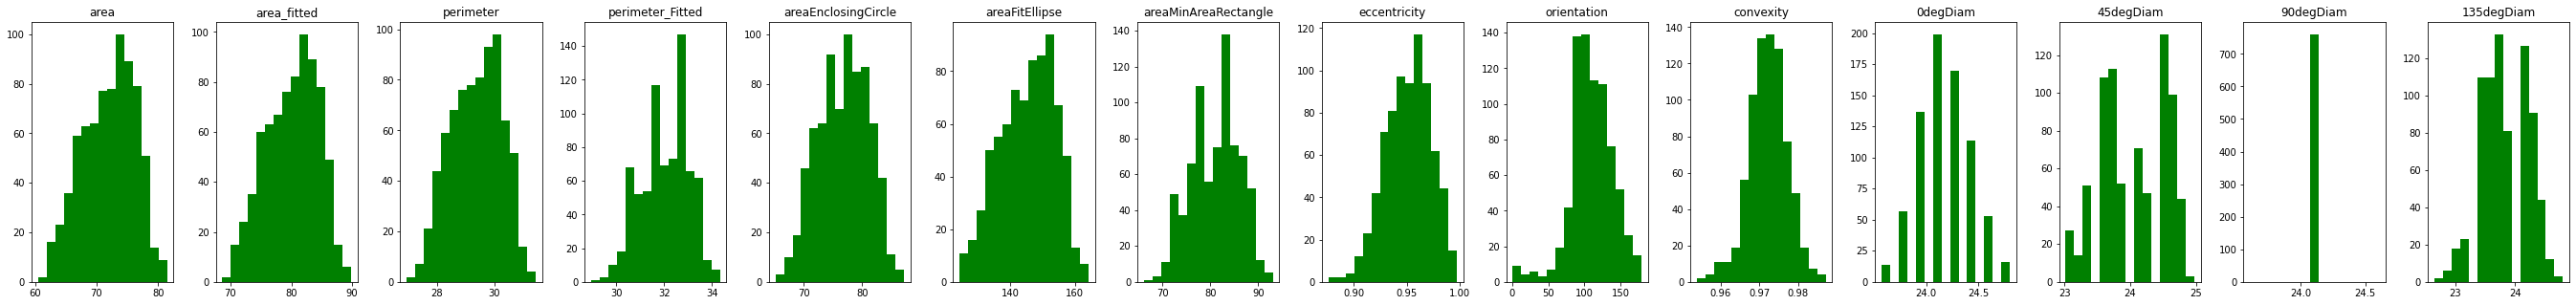

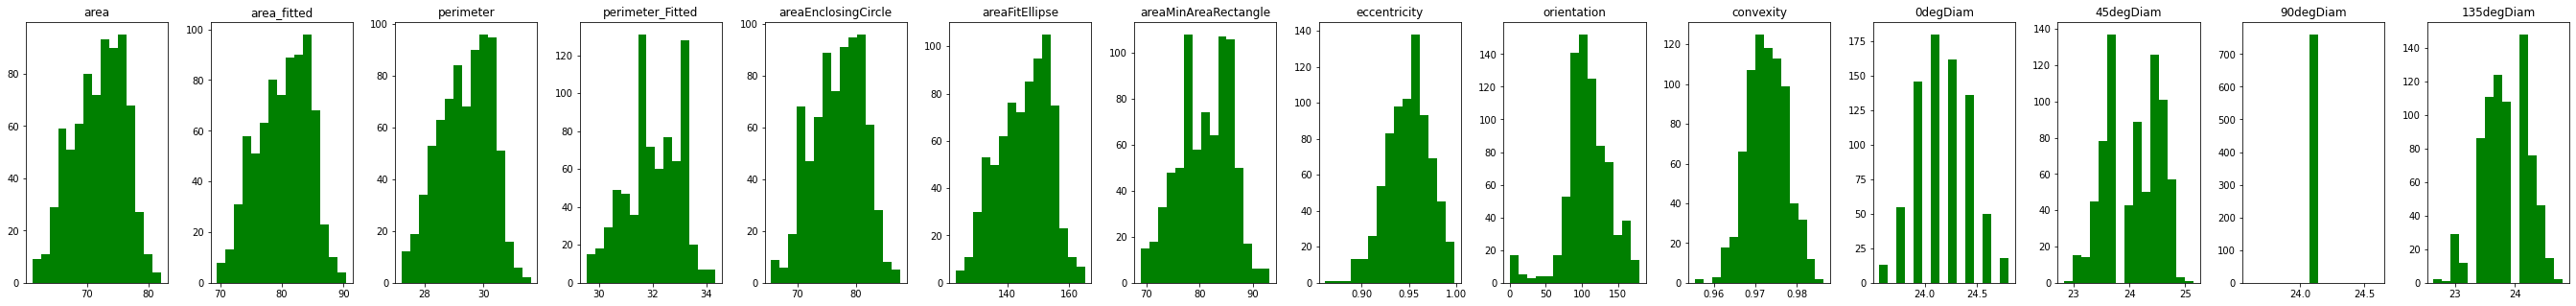

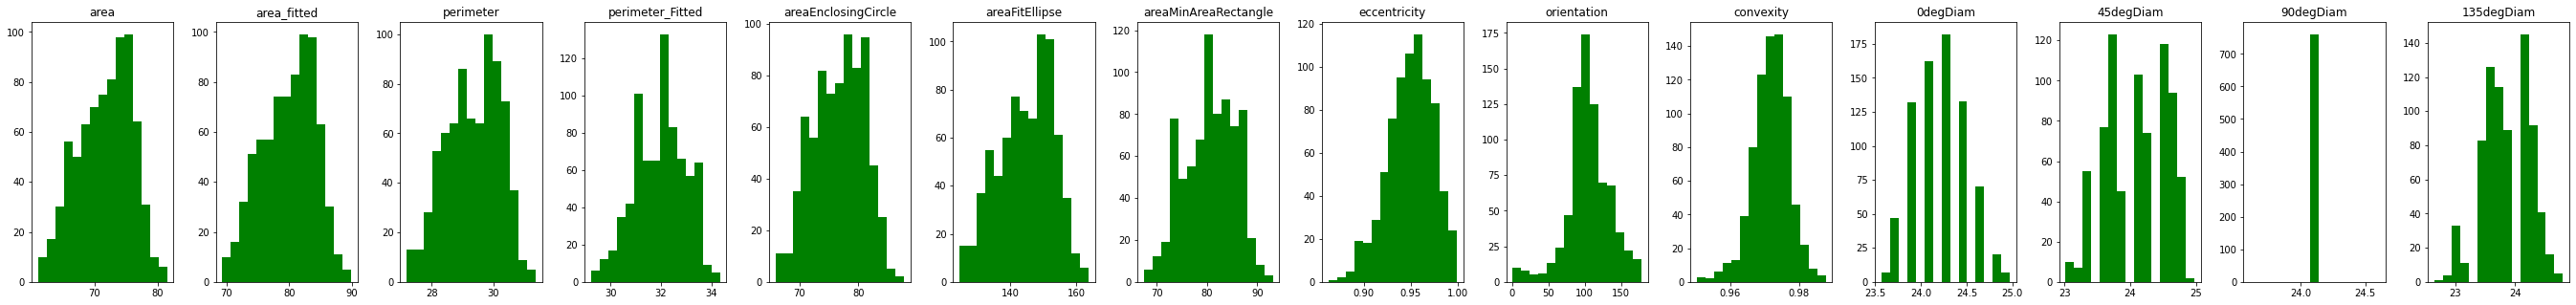

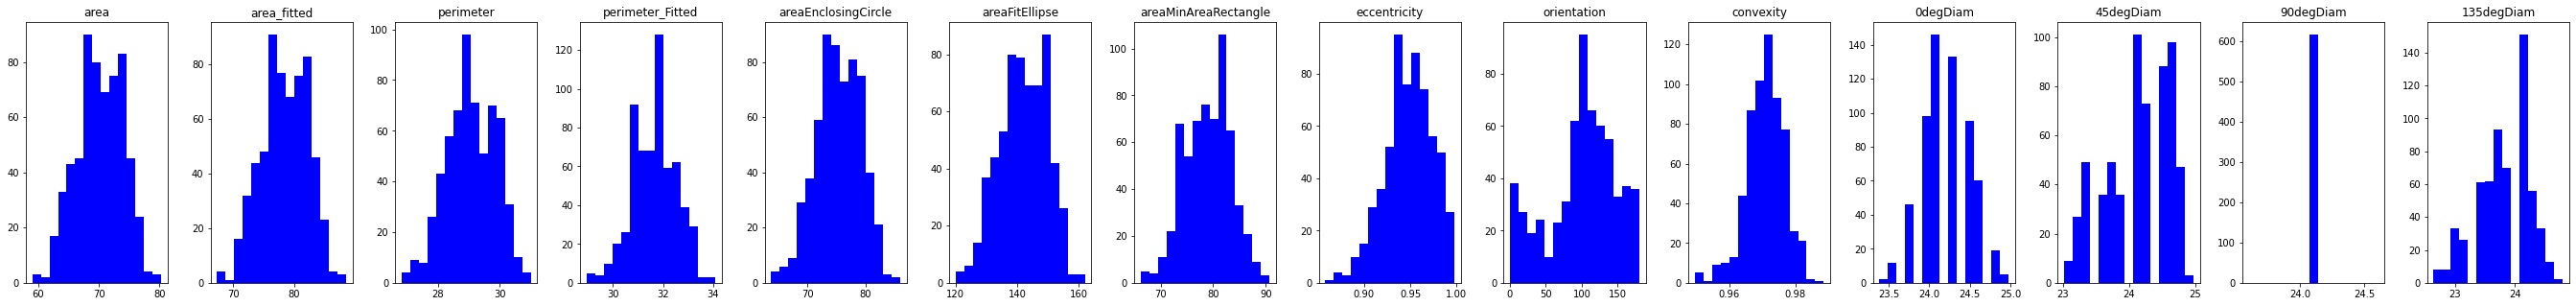

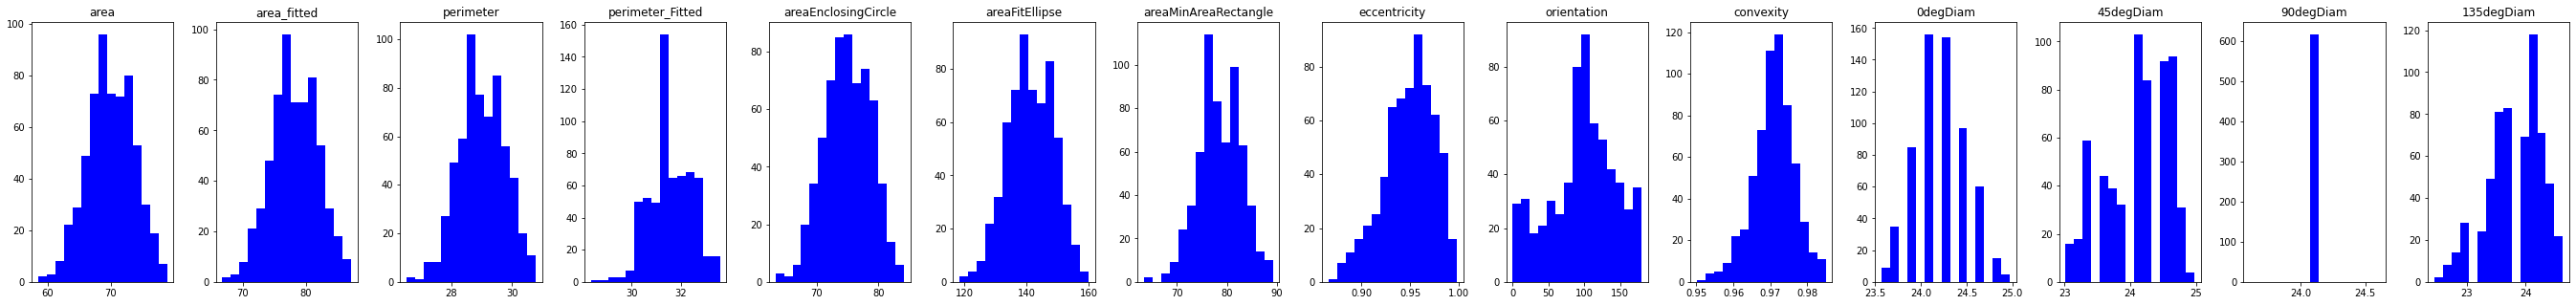

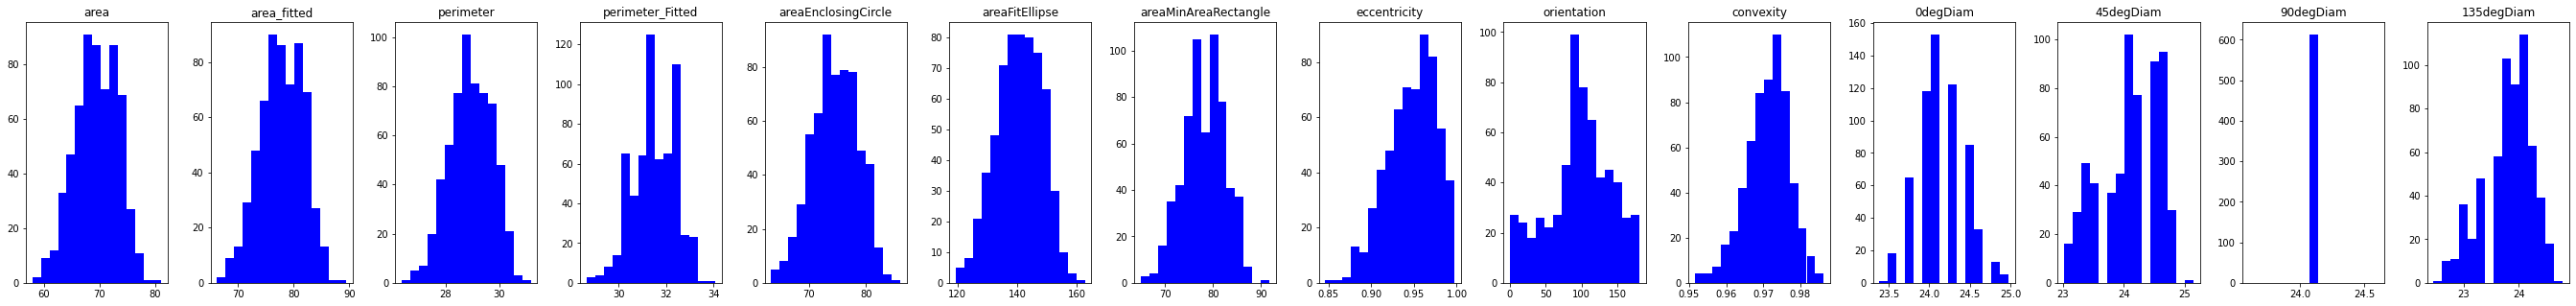

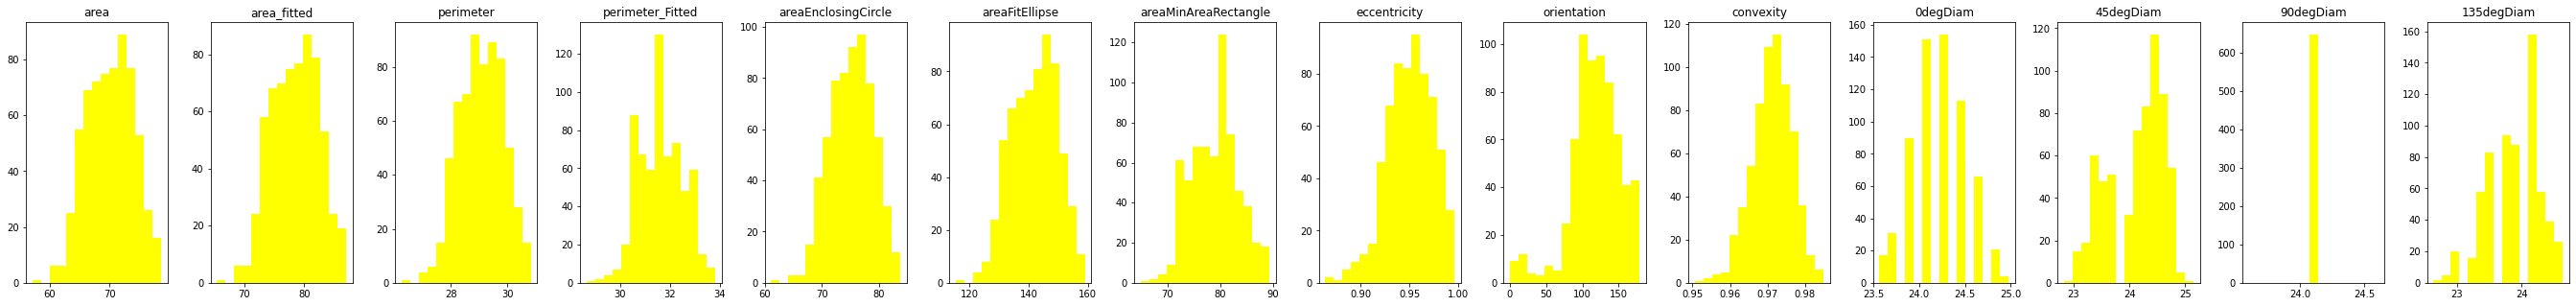

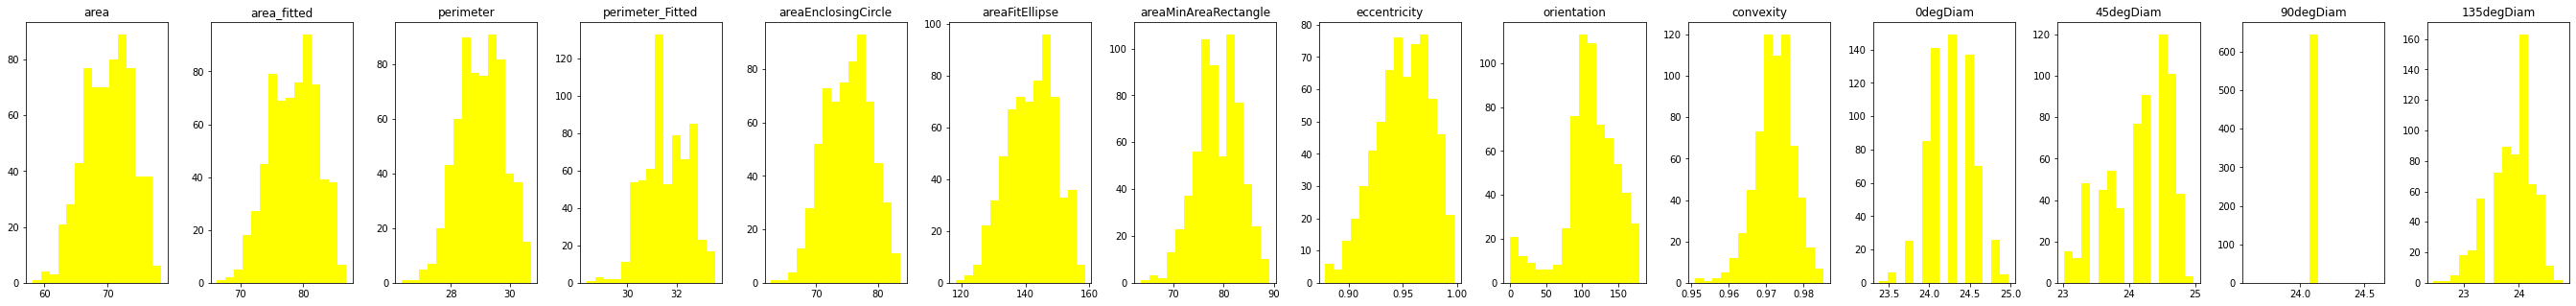

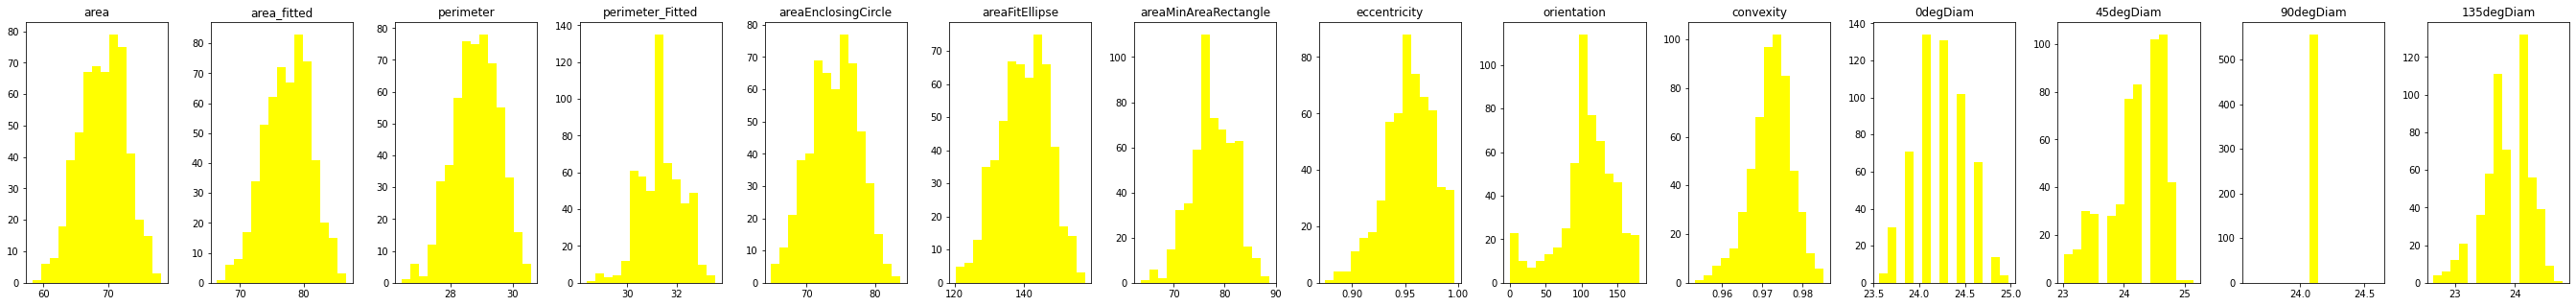

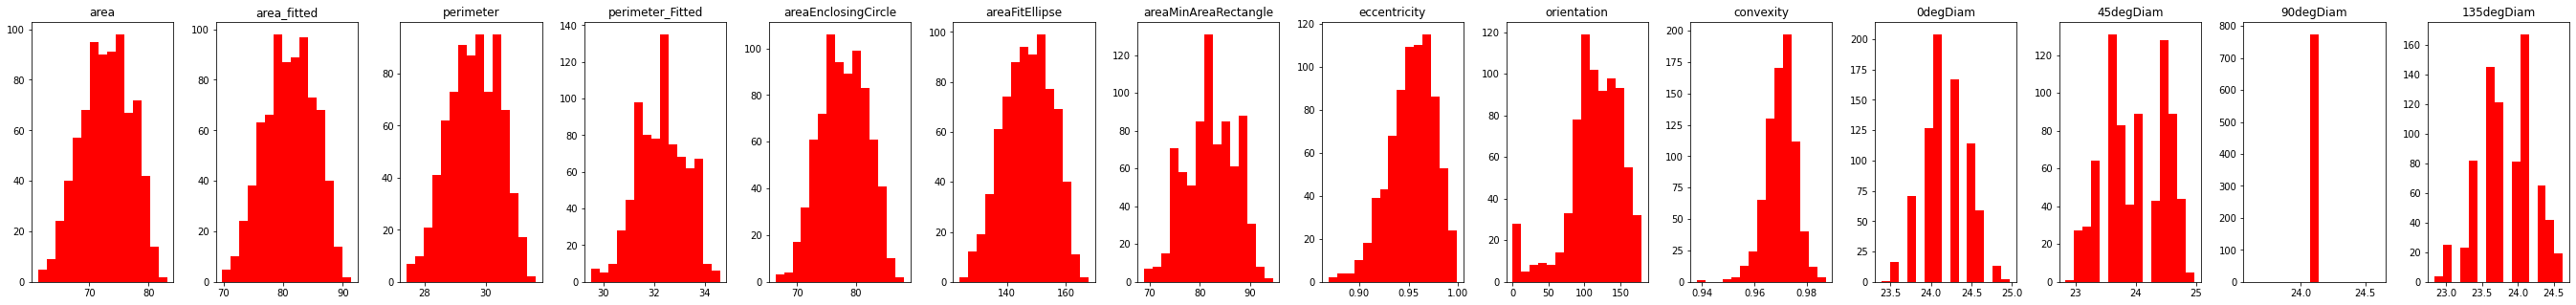

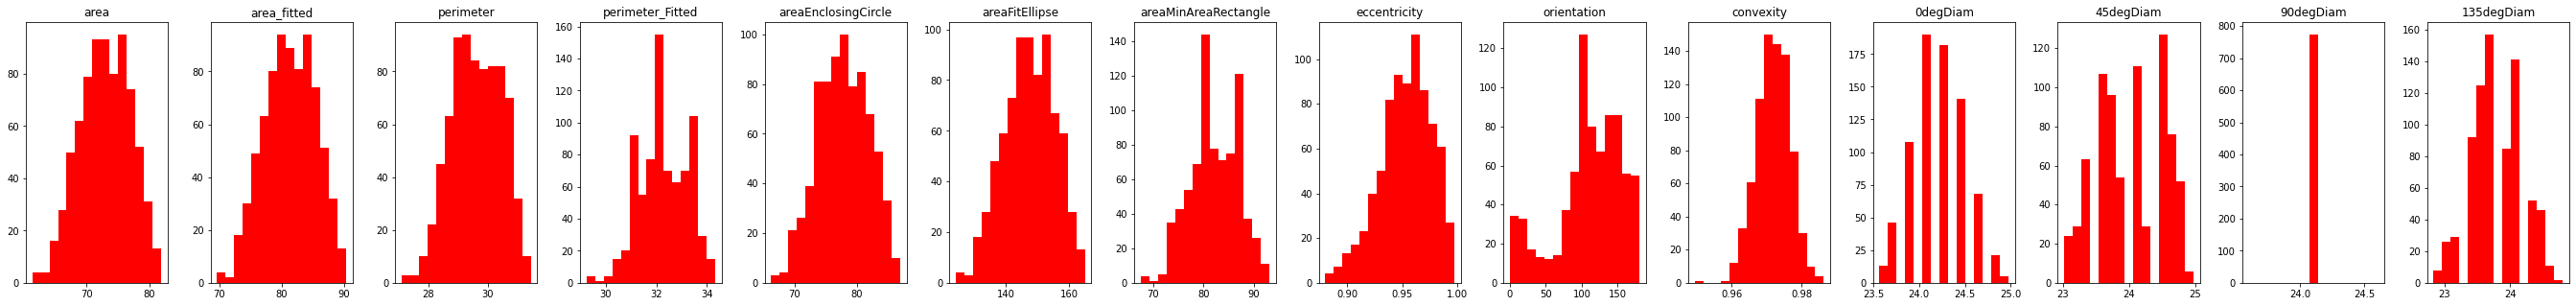

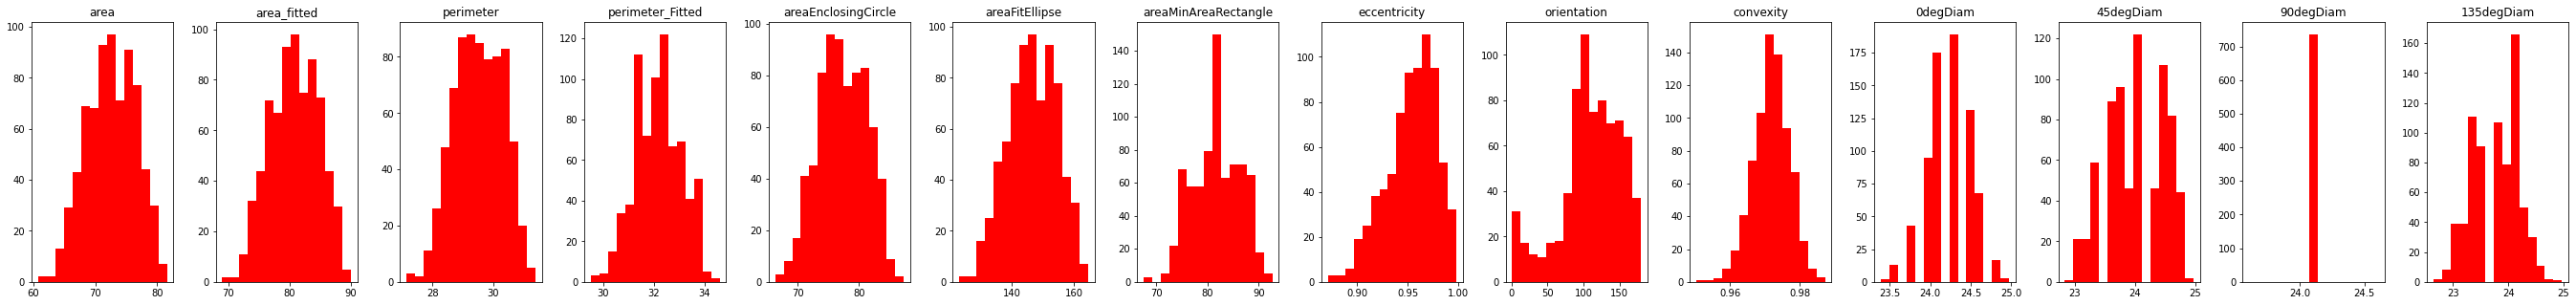

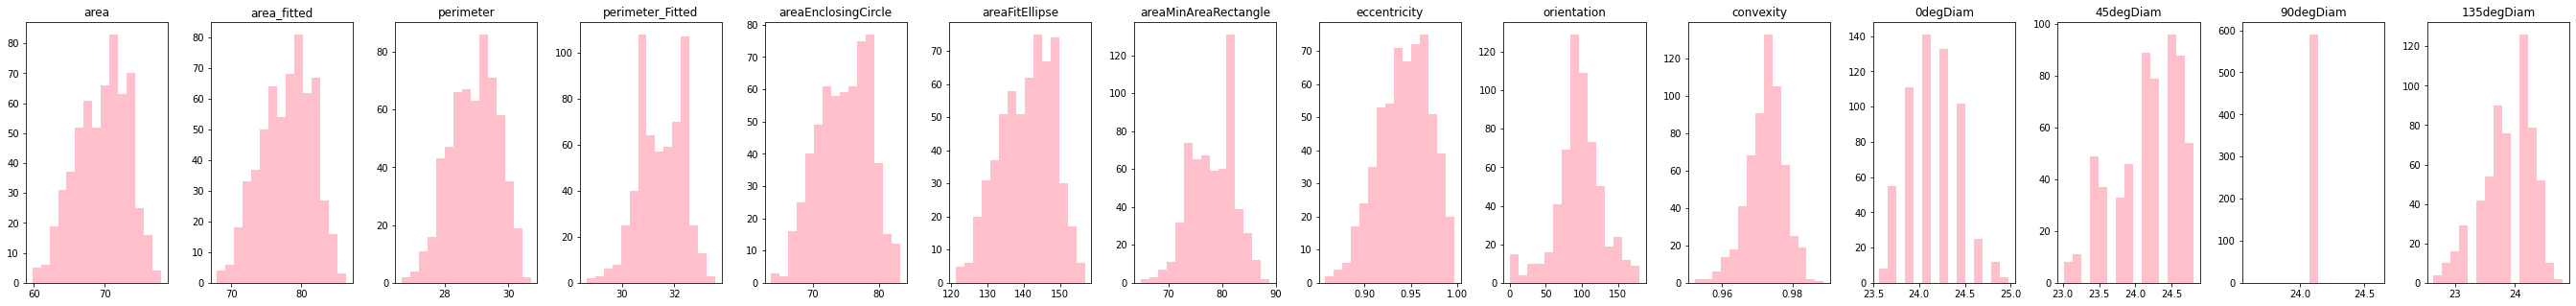

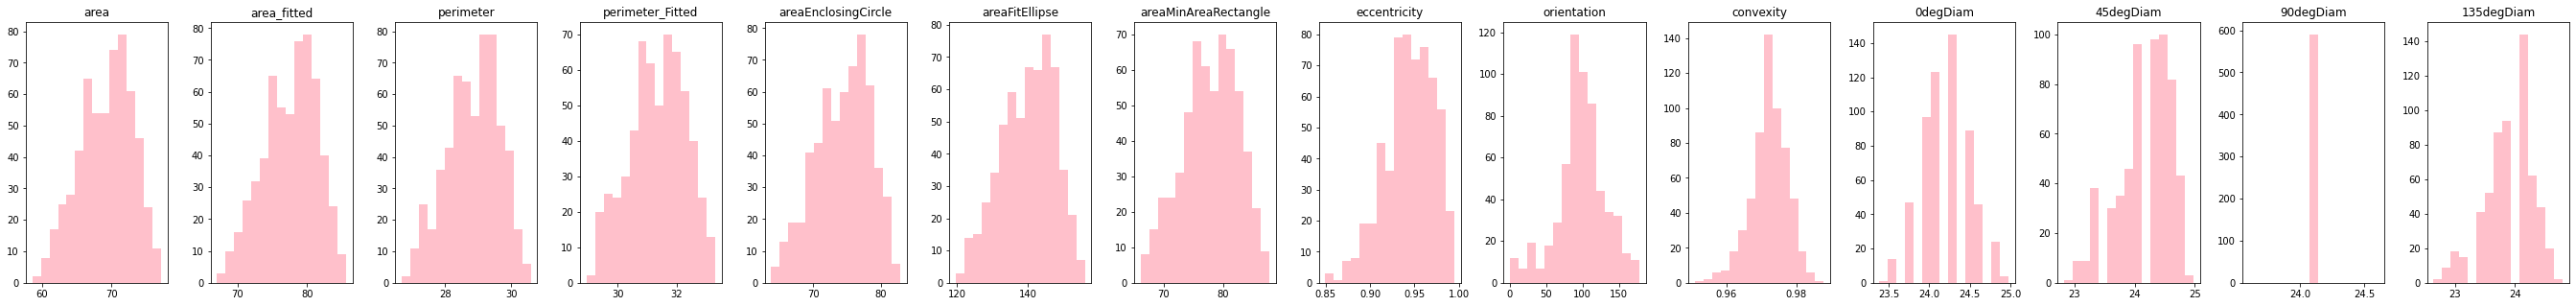

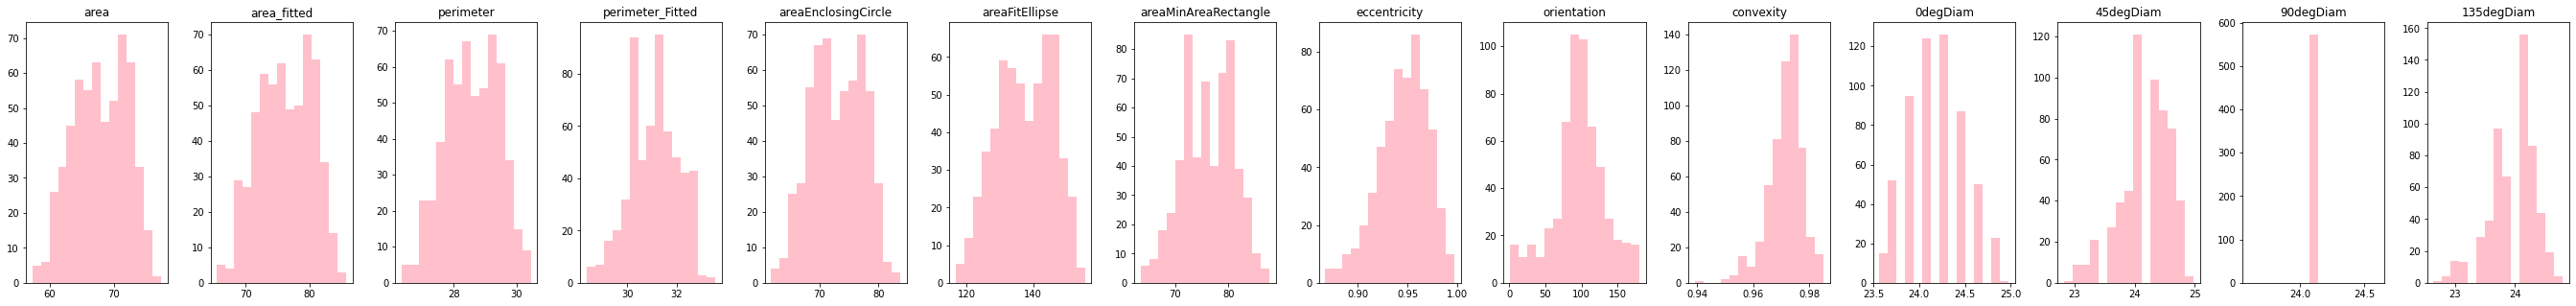

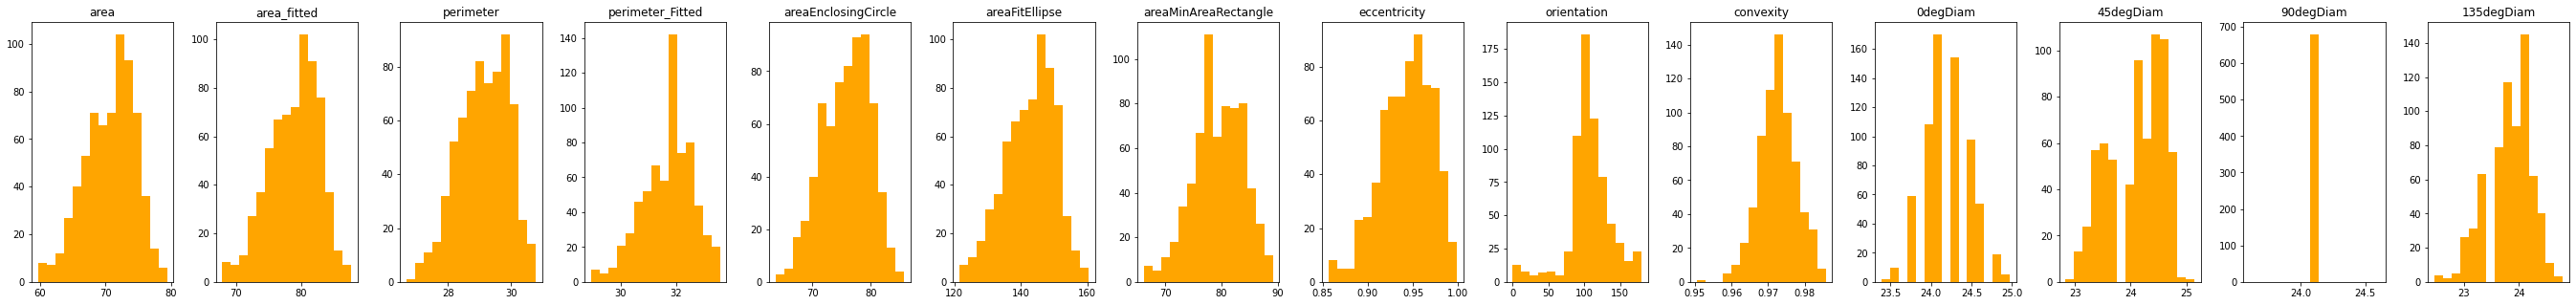

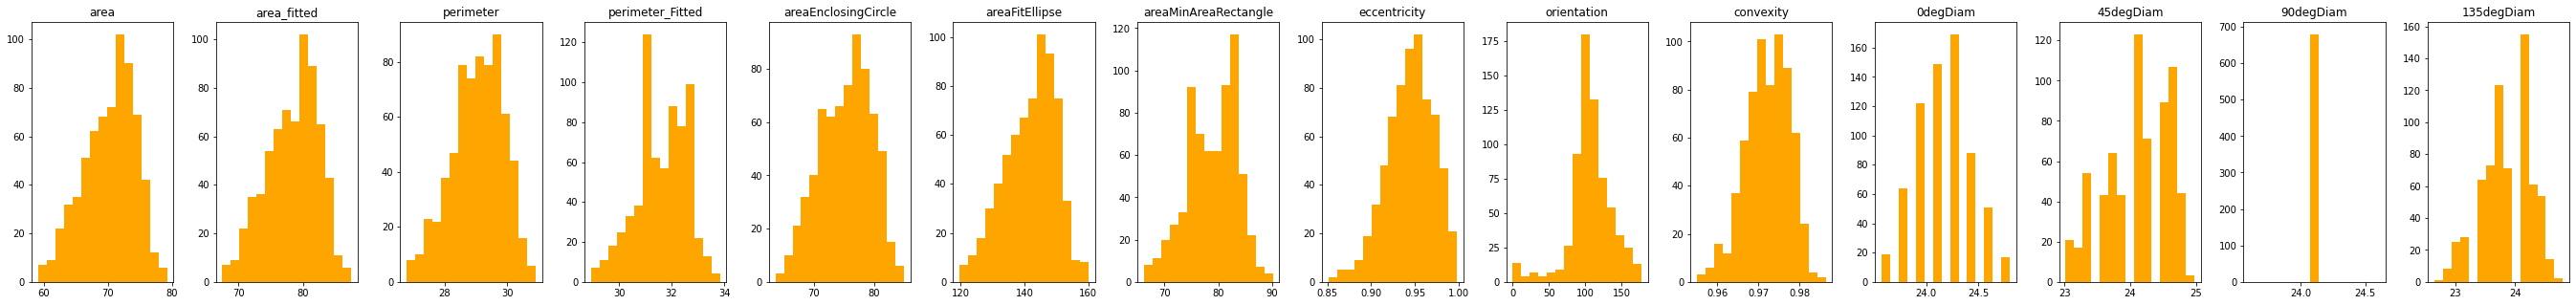

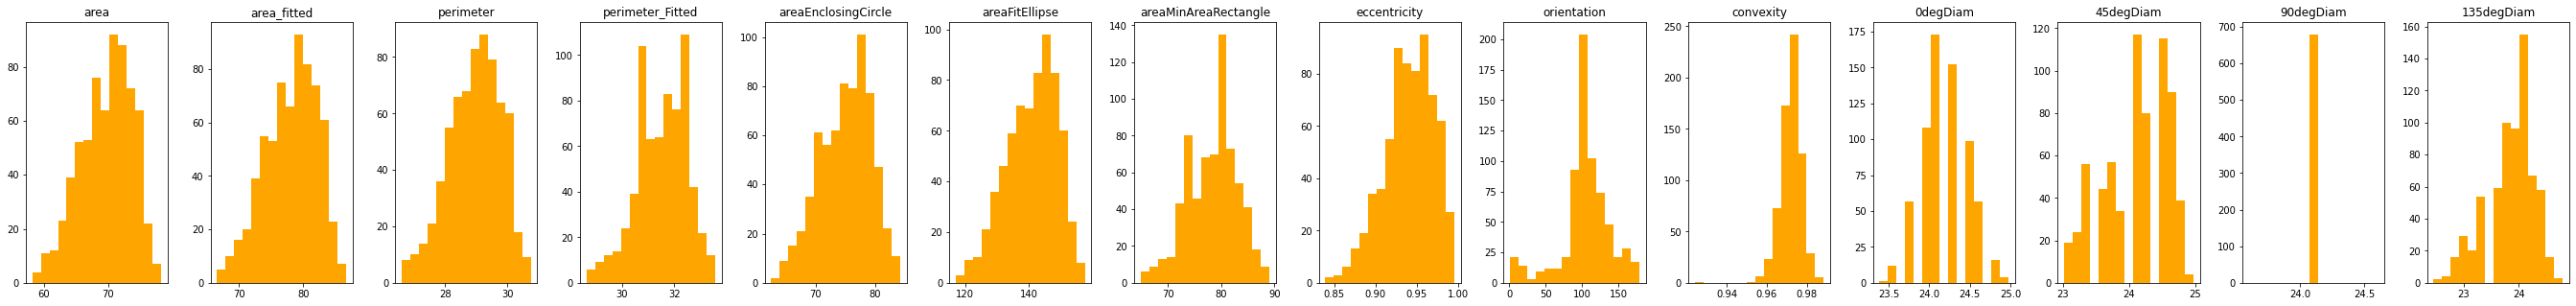

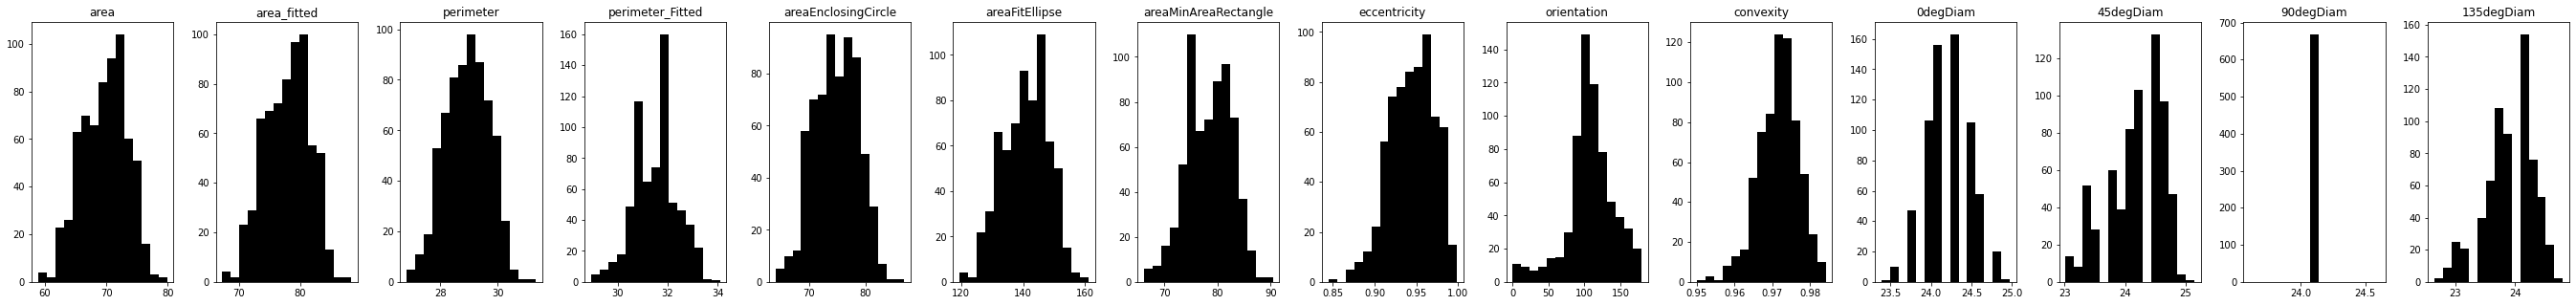

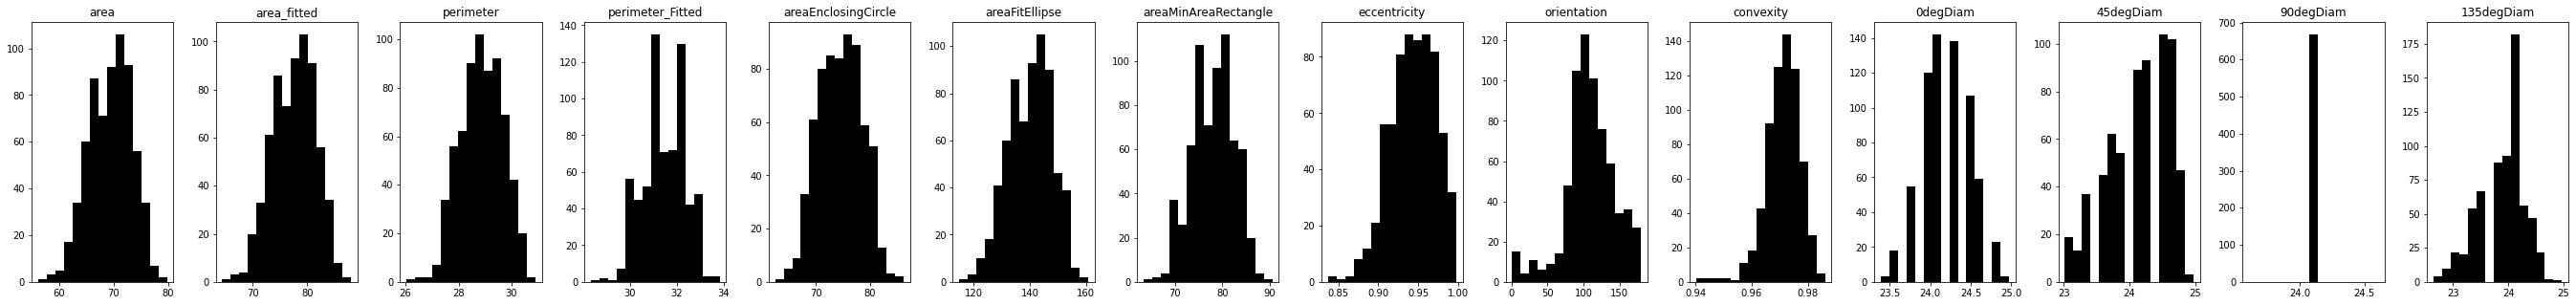

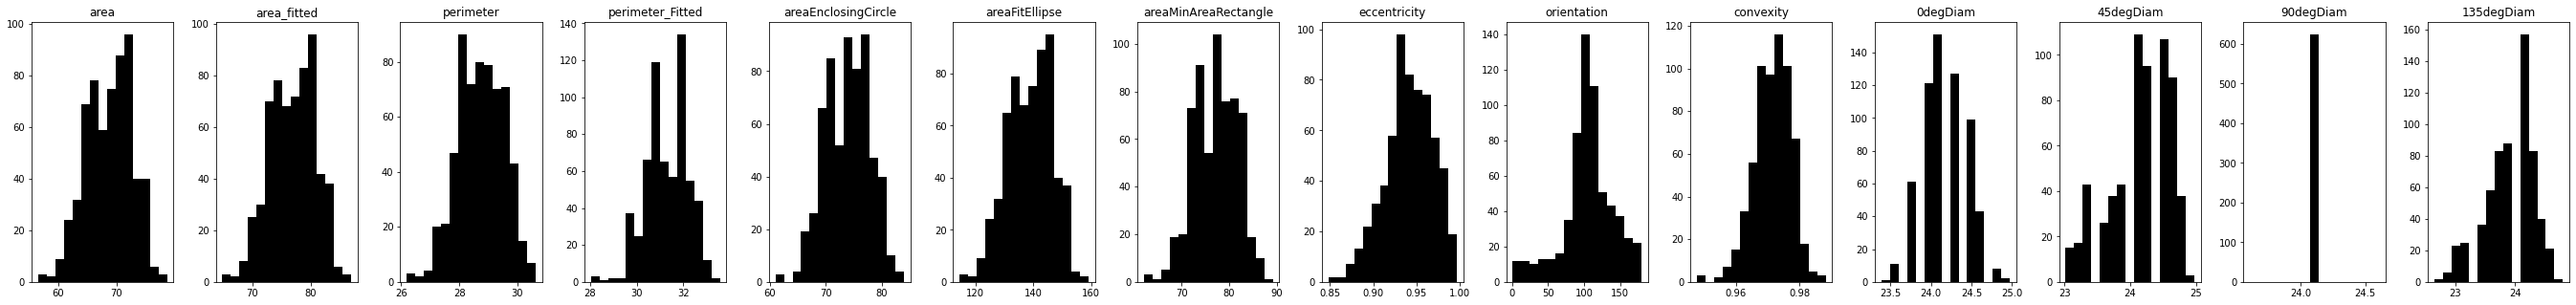

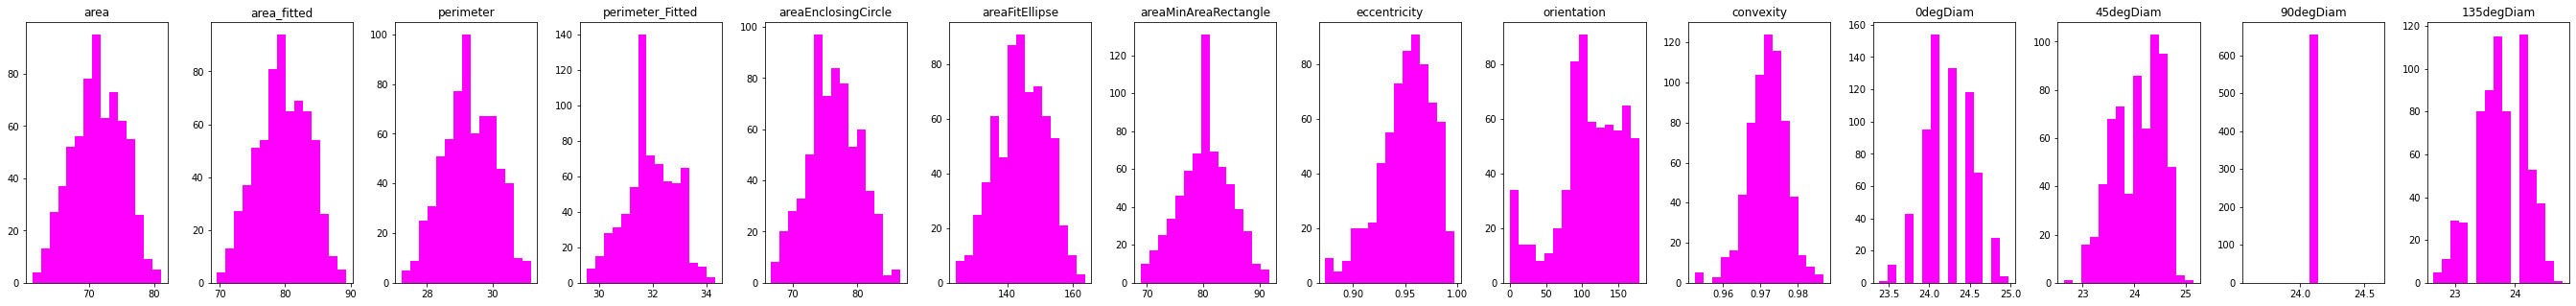

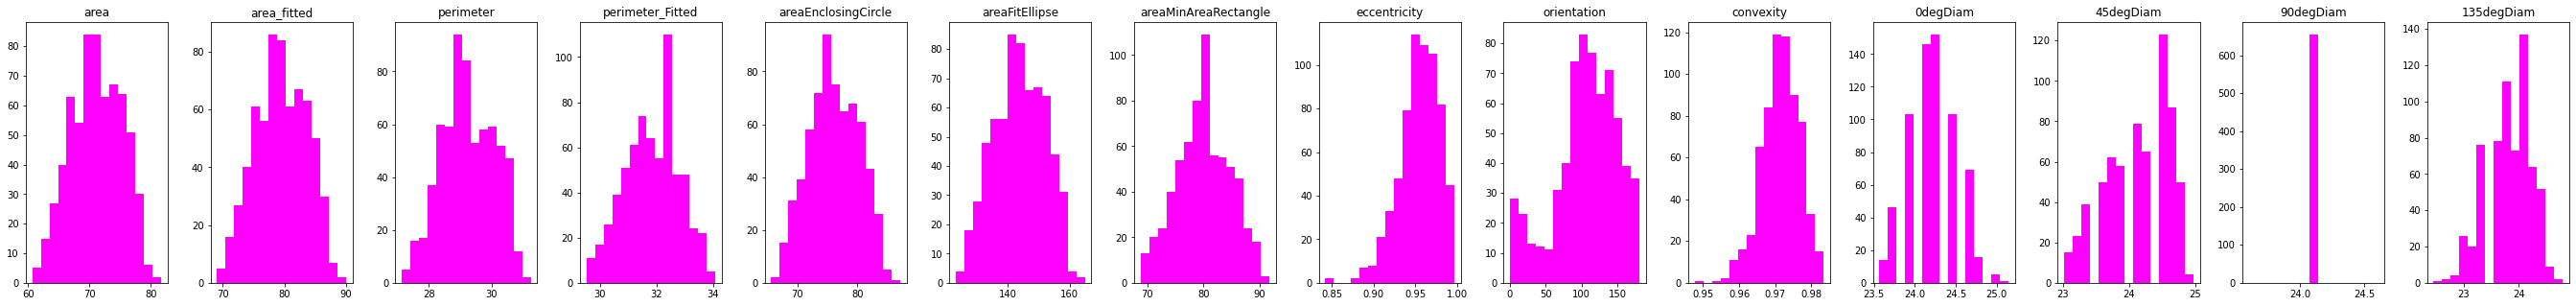

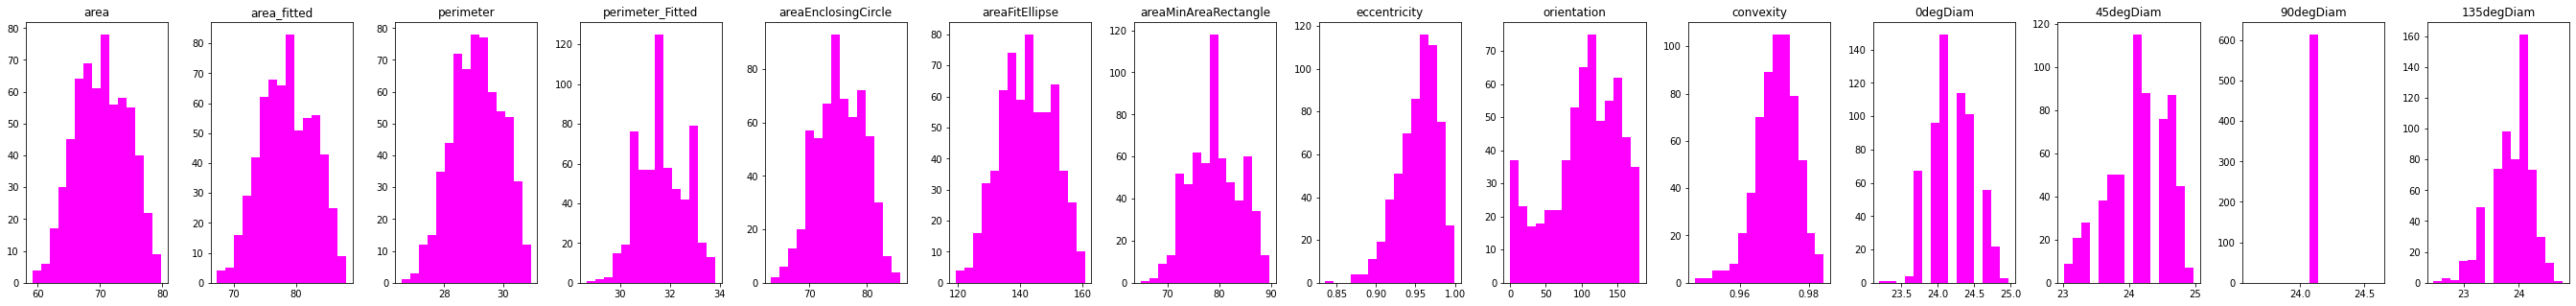

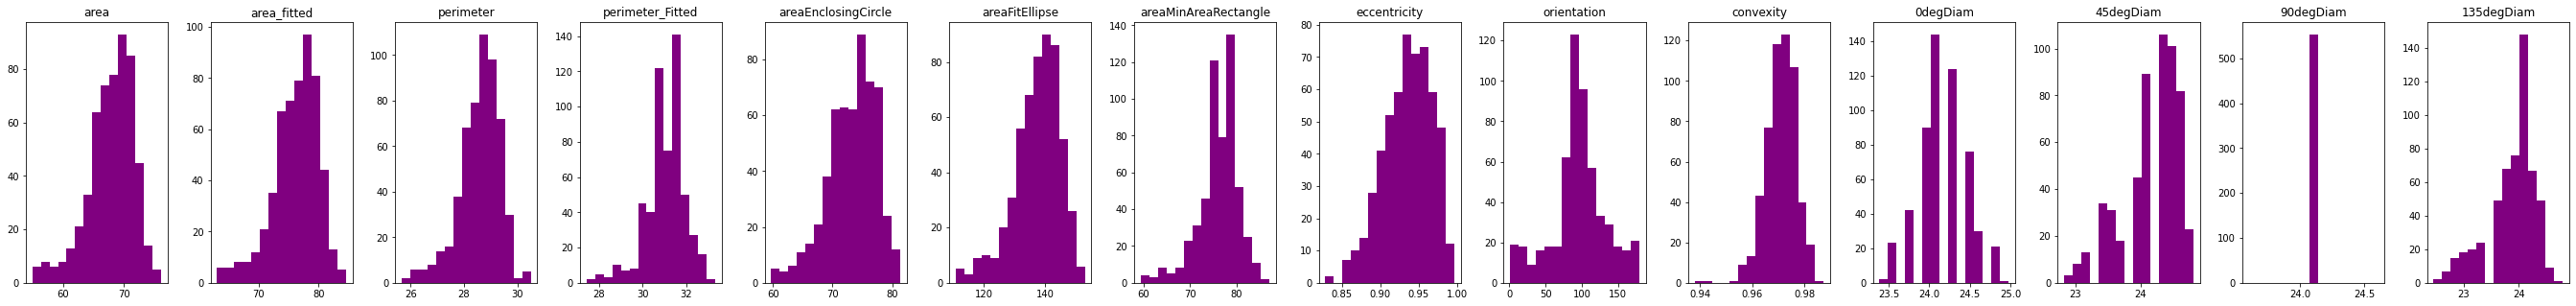

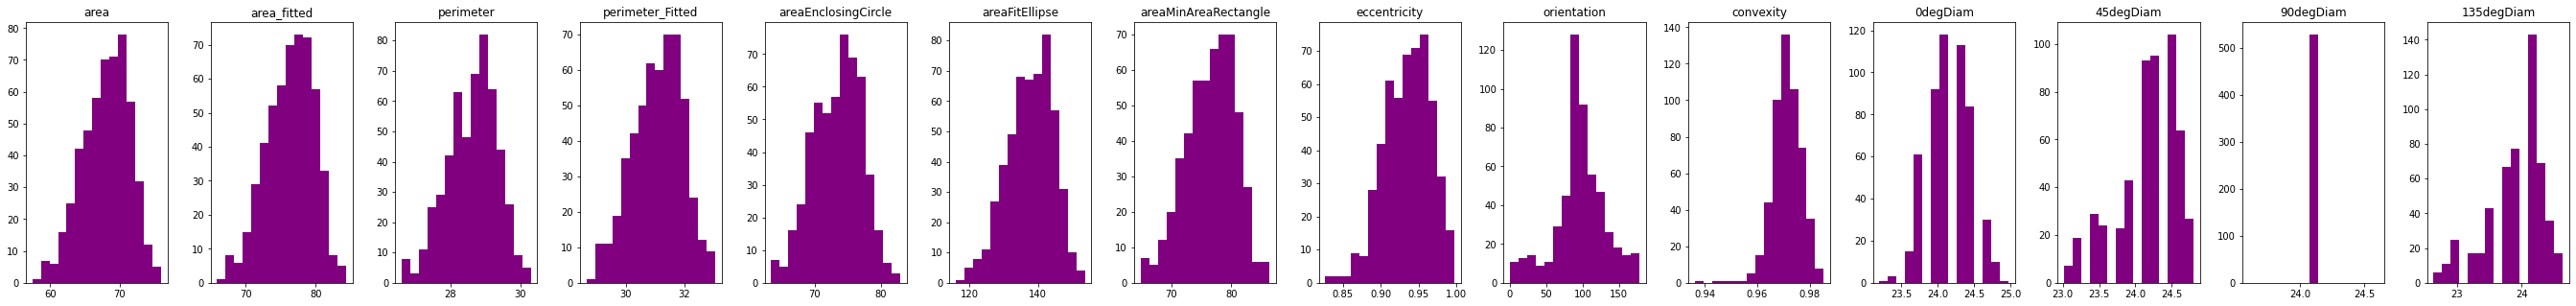

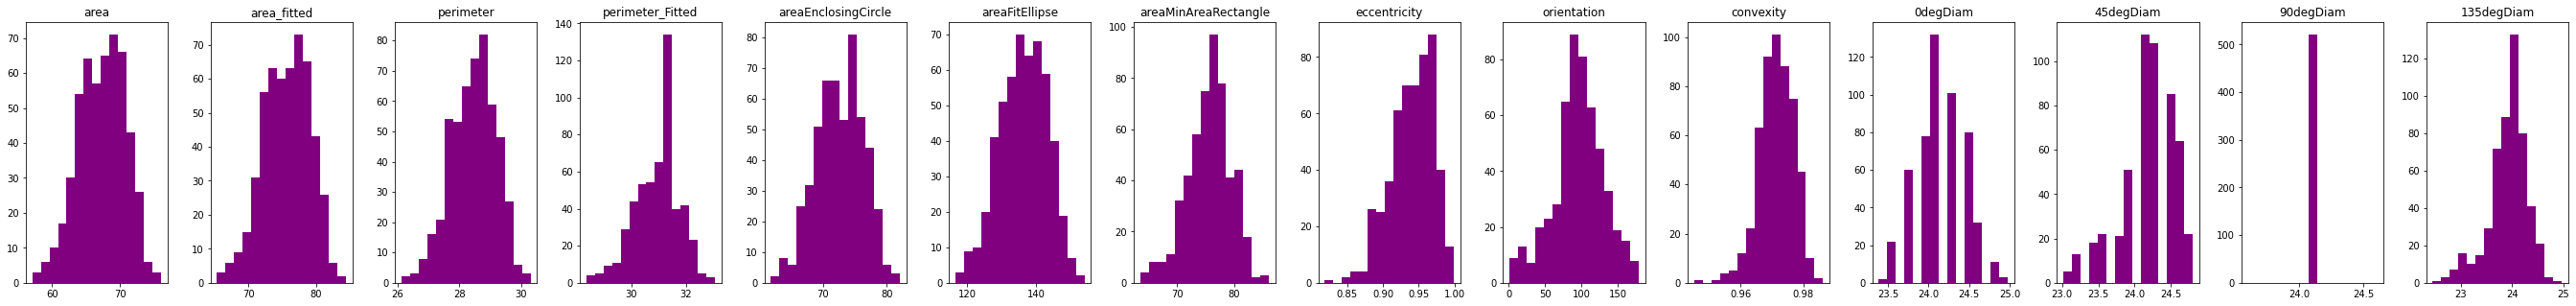

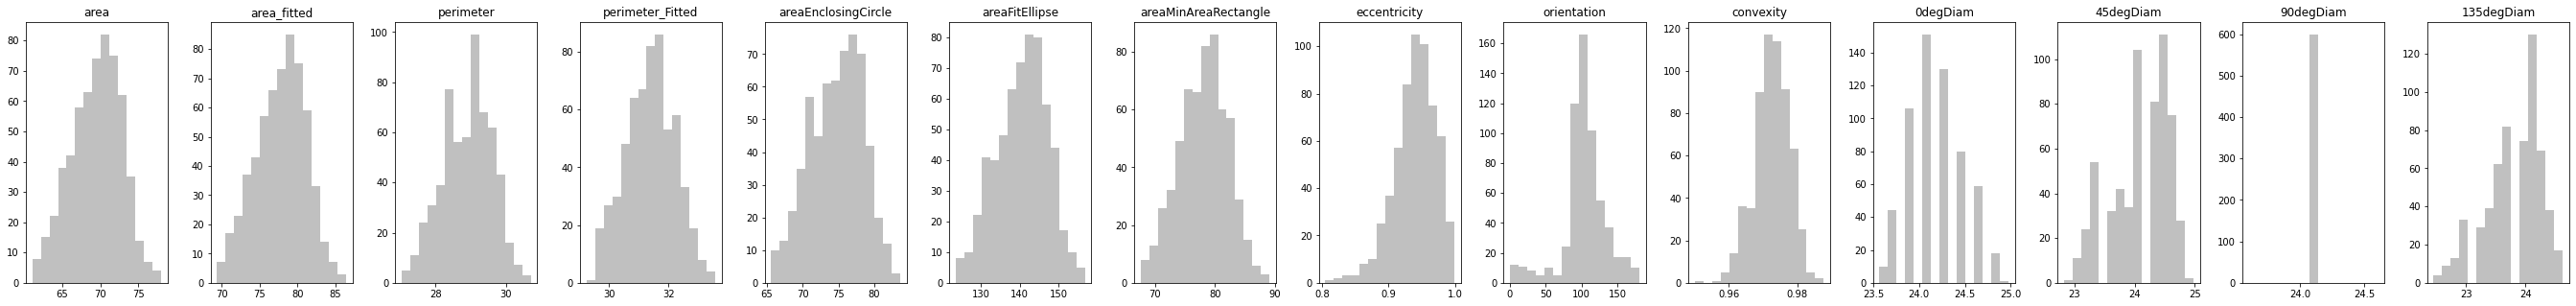

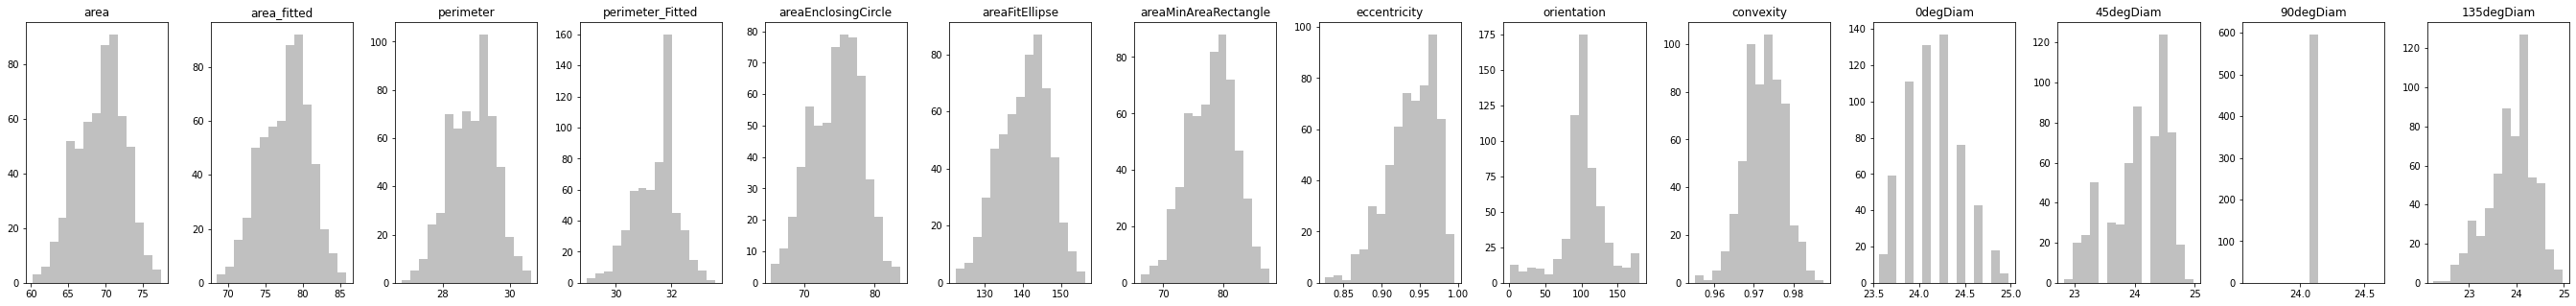

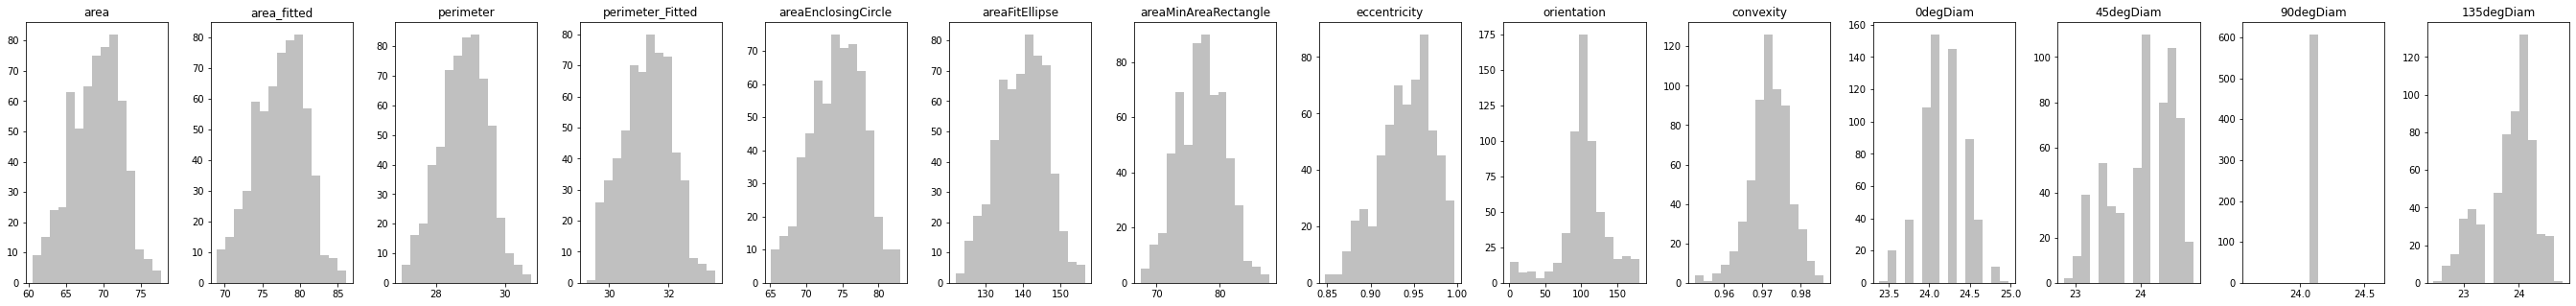

In [10]:
col=['green', 'blue', 'yellow', 'red', 'pink', 'orange', 'black', 'magenta', 'purple', 'silver']
dfl = (dfx[0][0].columns)
dfl0=dfl[3:(len(dfl))]

for d in range(0, len(dfx[0])):
    for f in range(0, len(dfx)):         
        dff = copy.deepcopy(dfx[f][d])       
        dff.hist(column=dfl0,
            bins=15,               
            grid=False,
            figsize=(51, 5),
            layout = (1, len(dfl0)+1),
            orientation='vertical',
            color=col[d]);

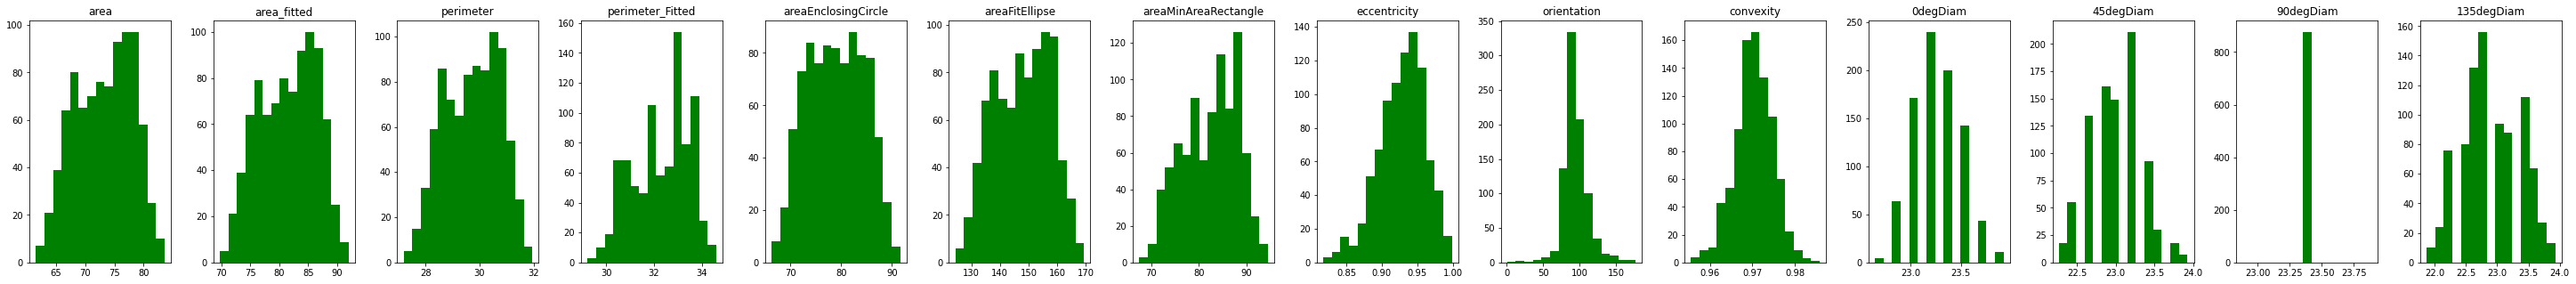

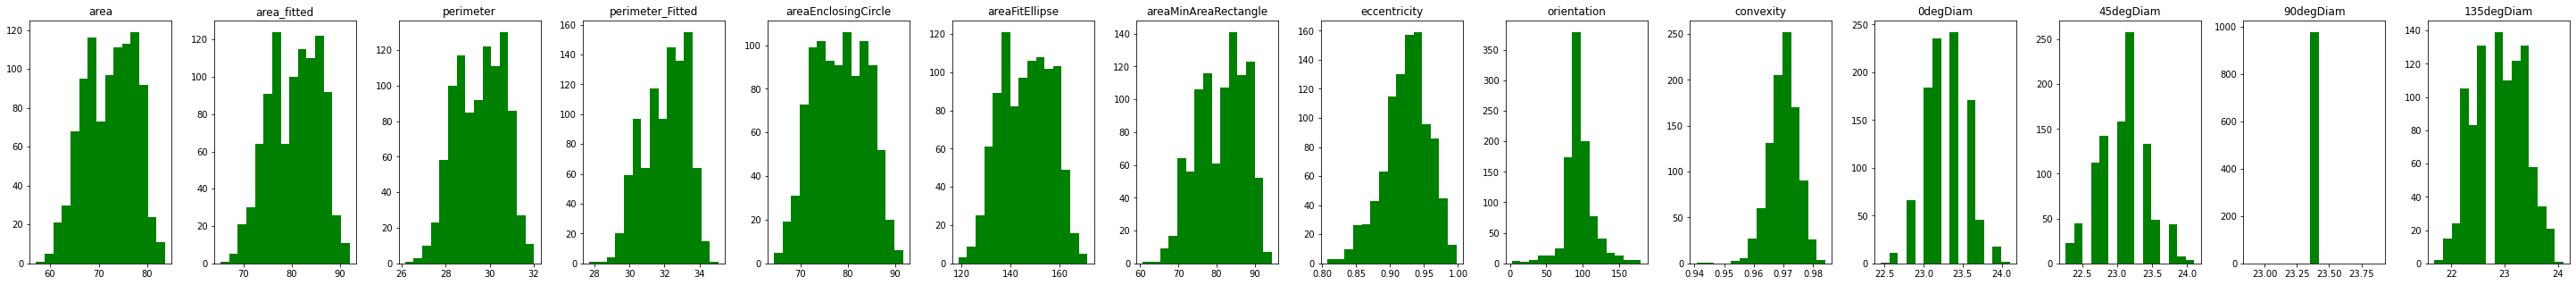

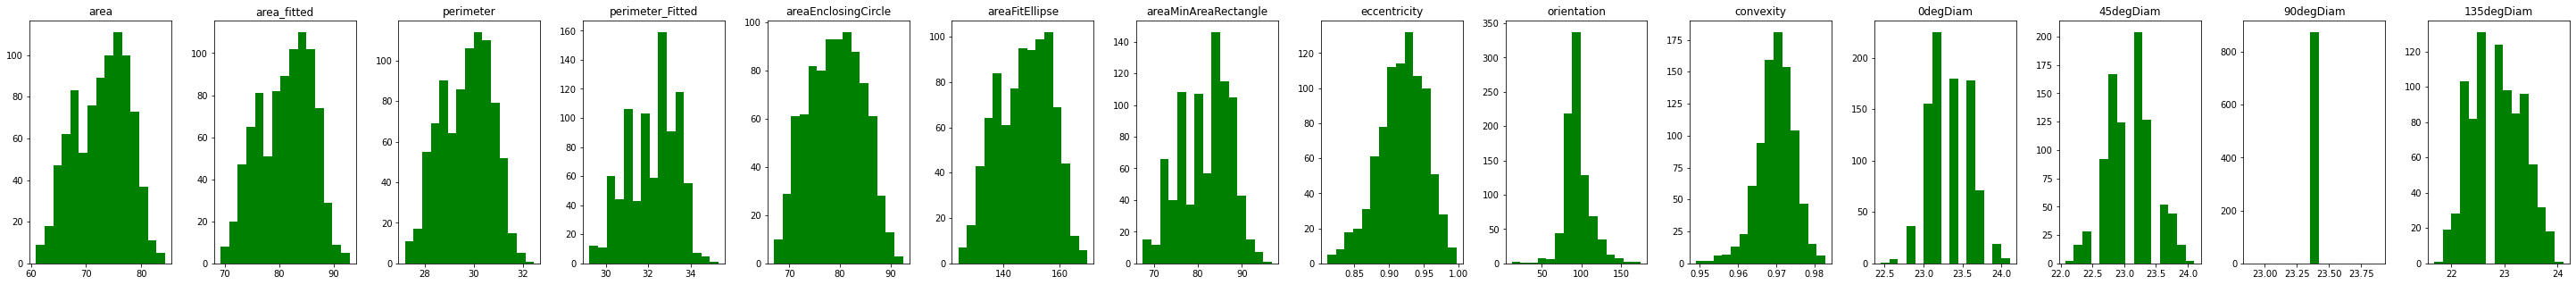

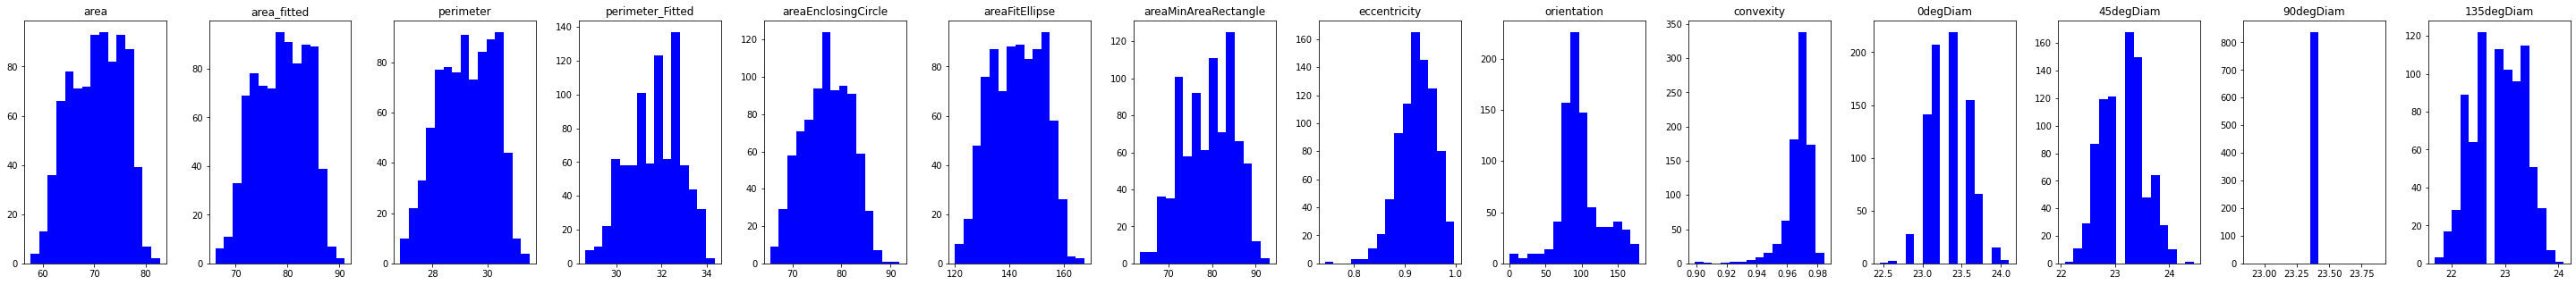

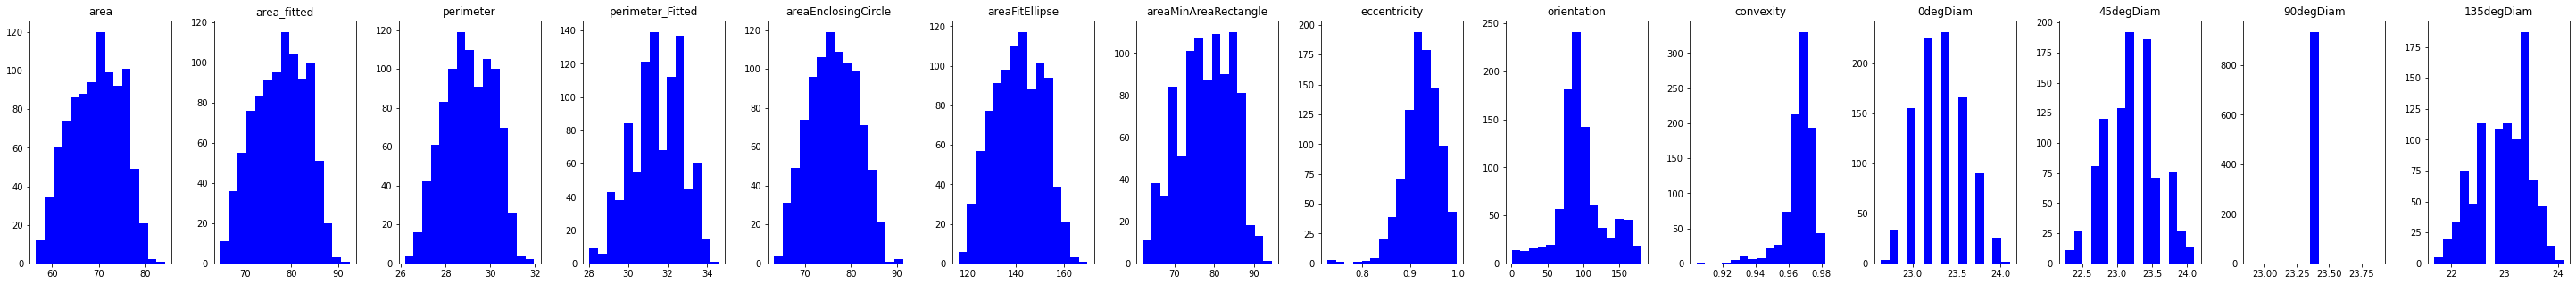

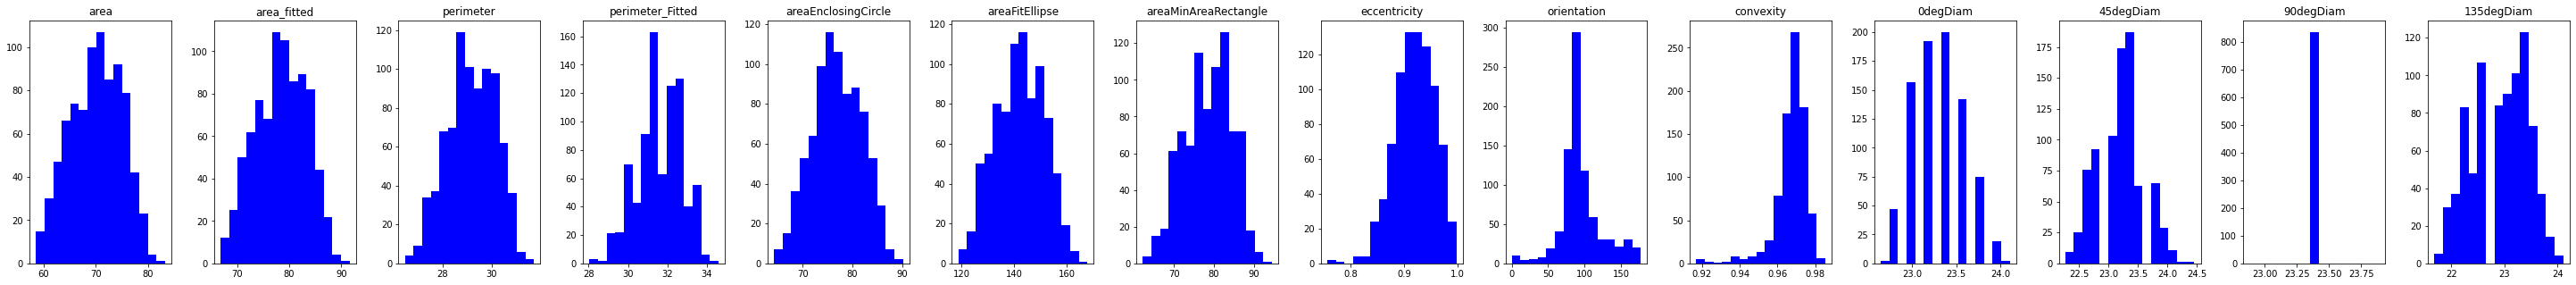

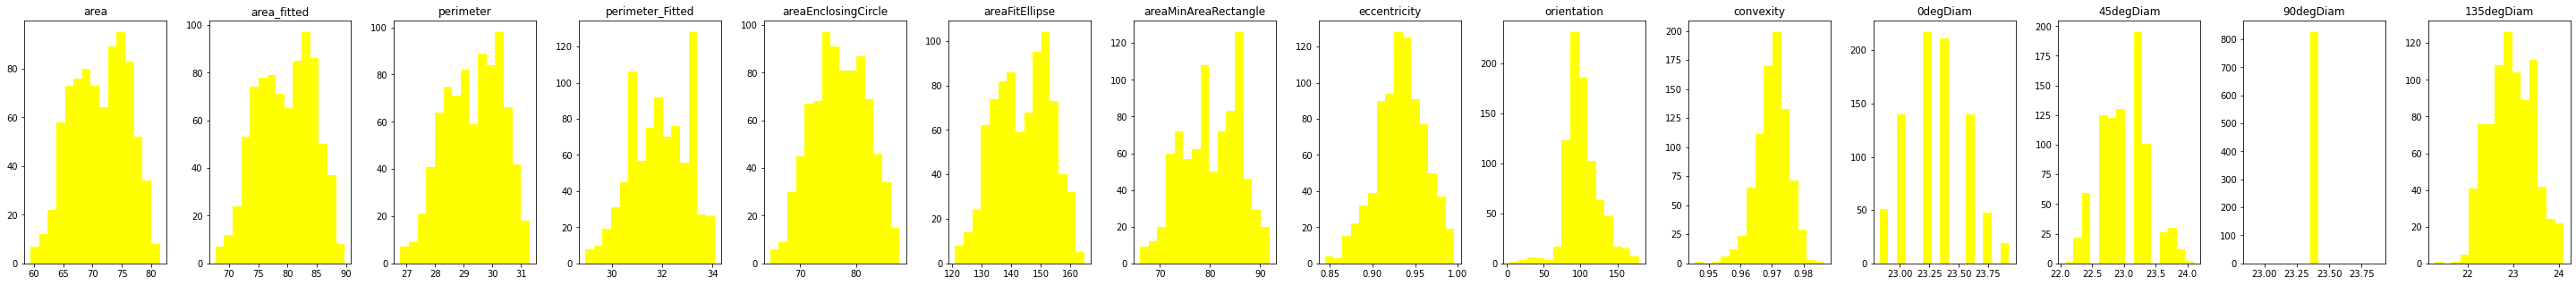

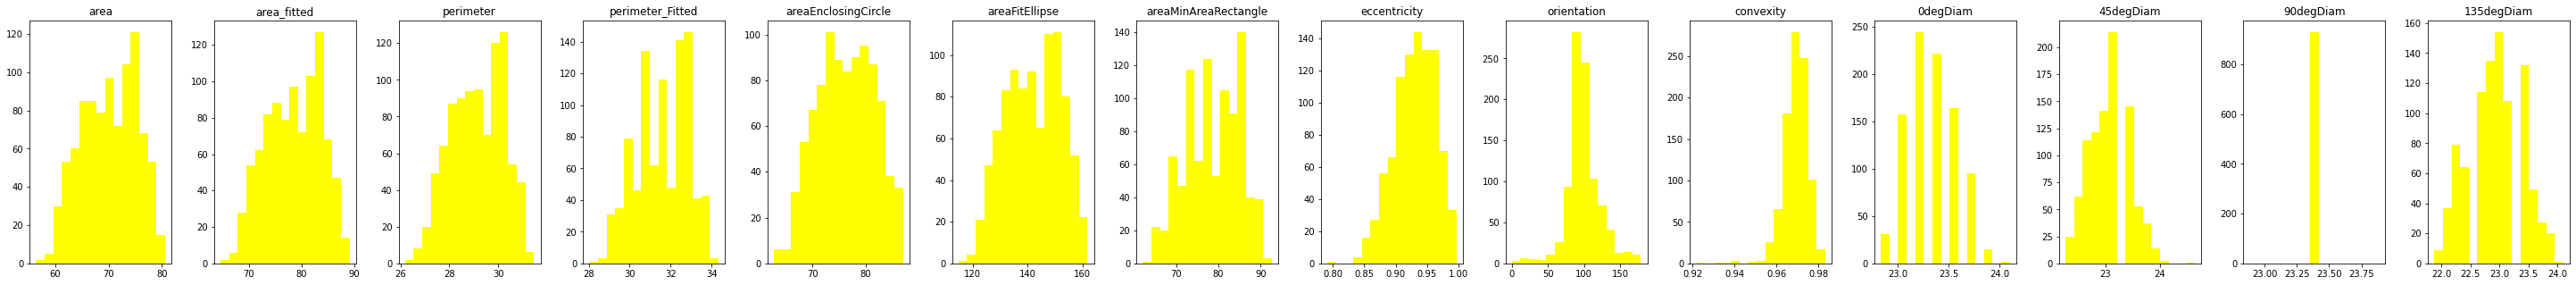

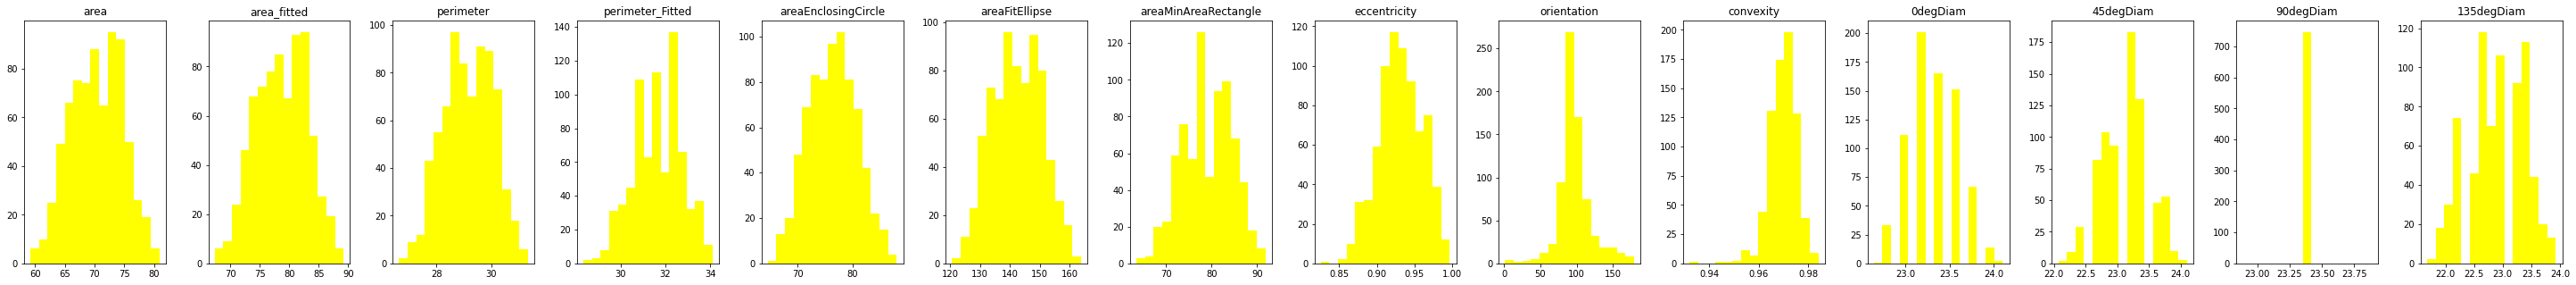

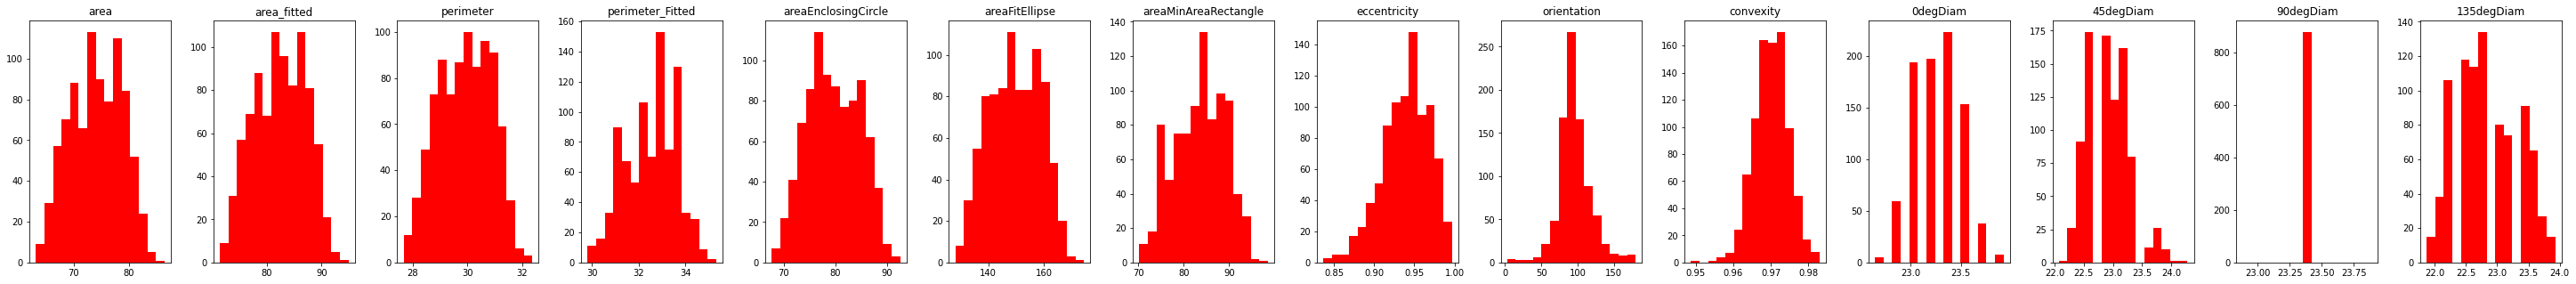

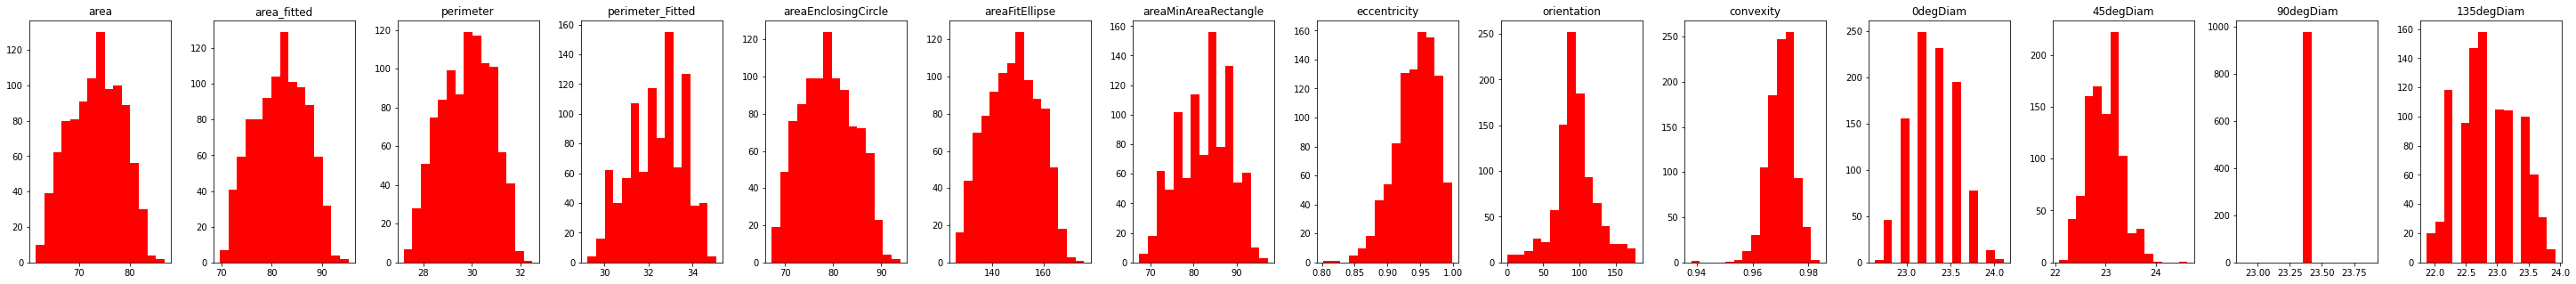

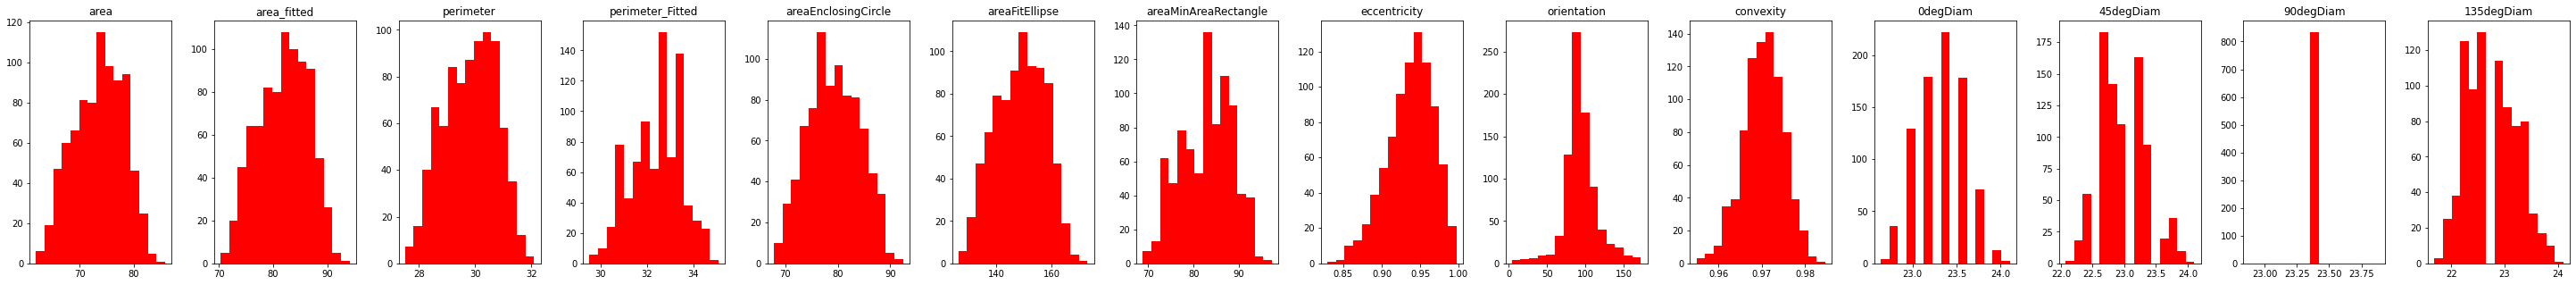

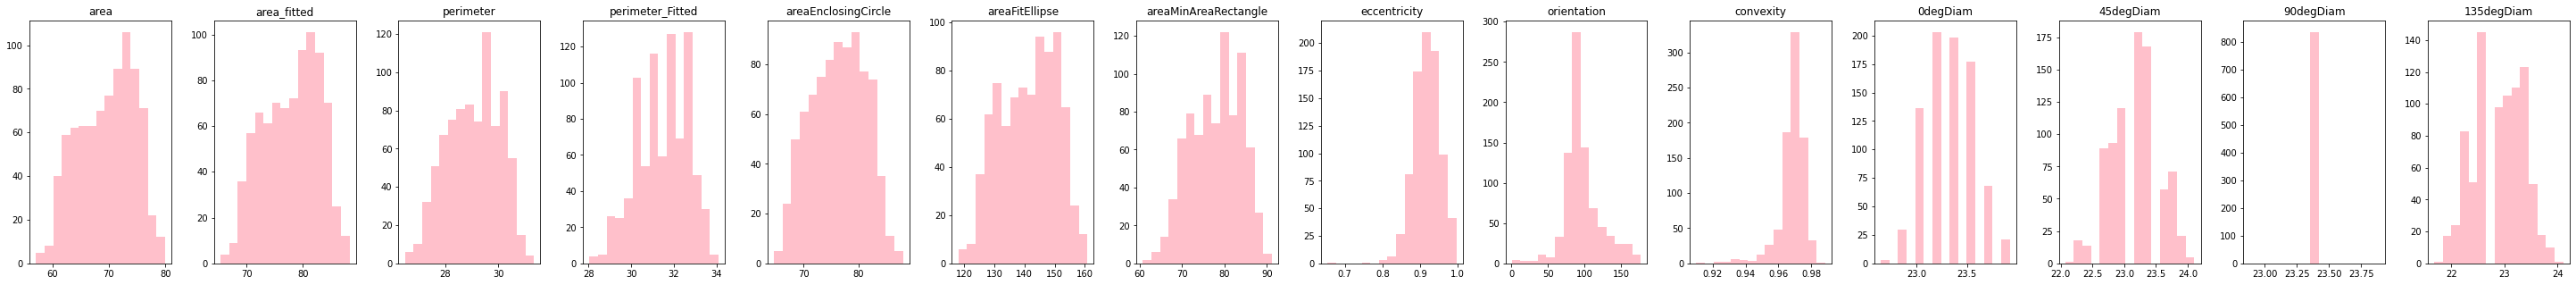

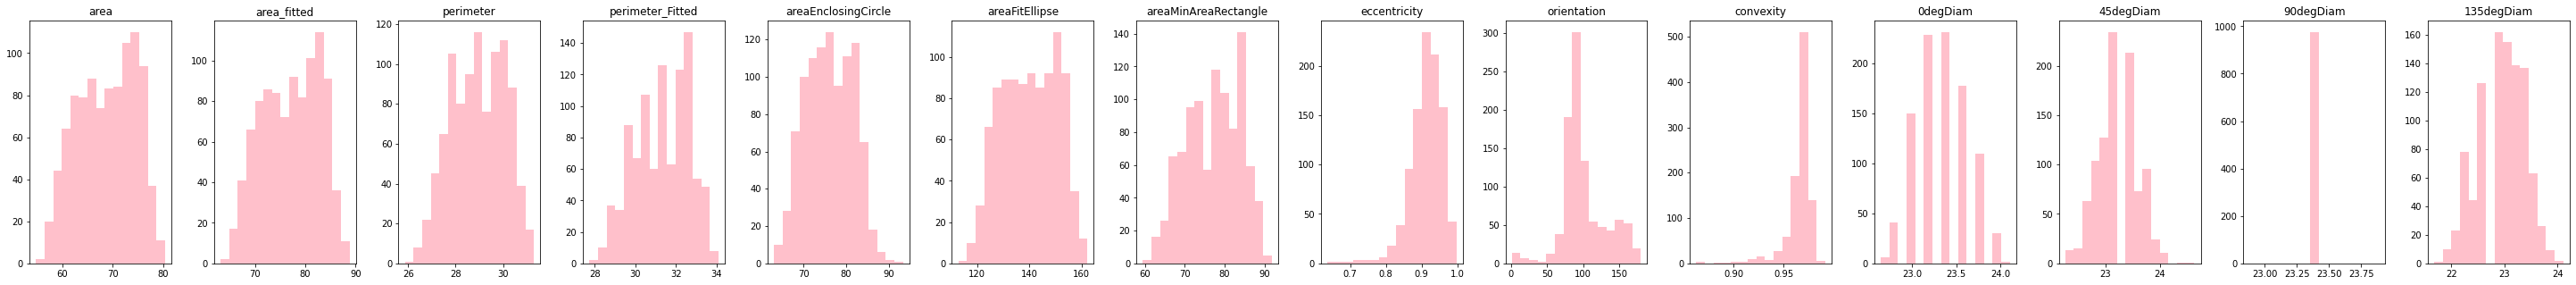

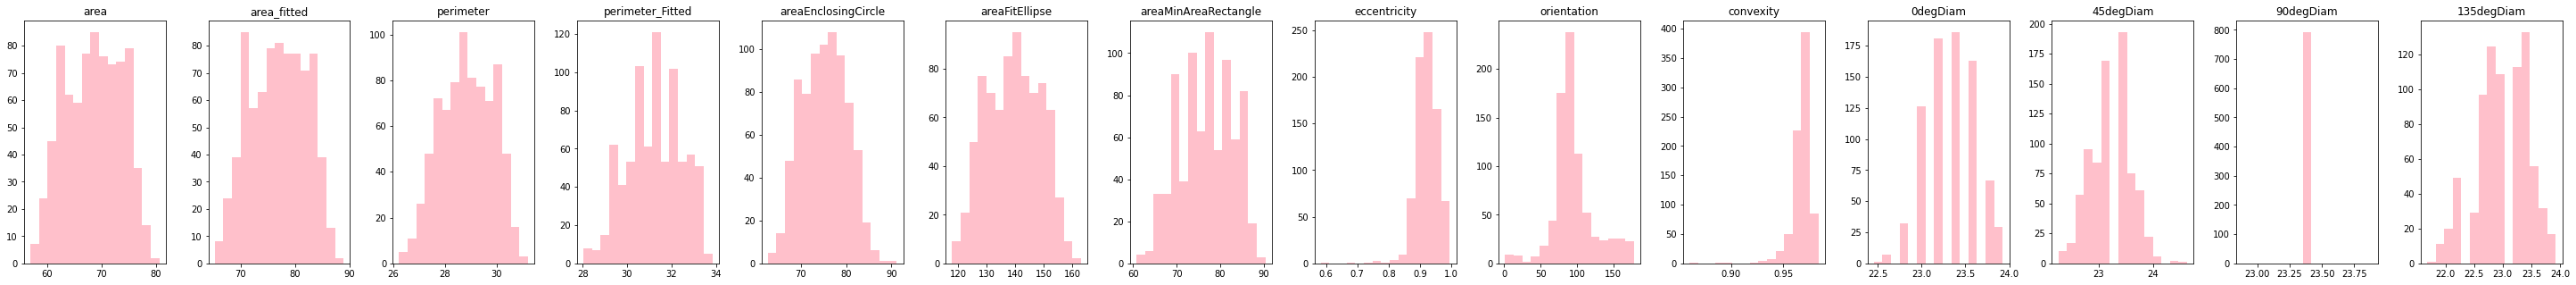

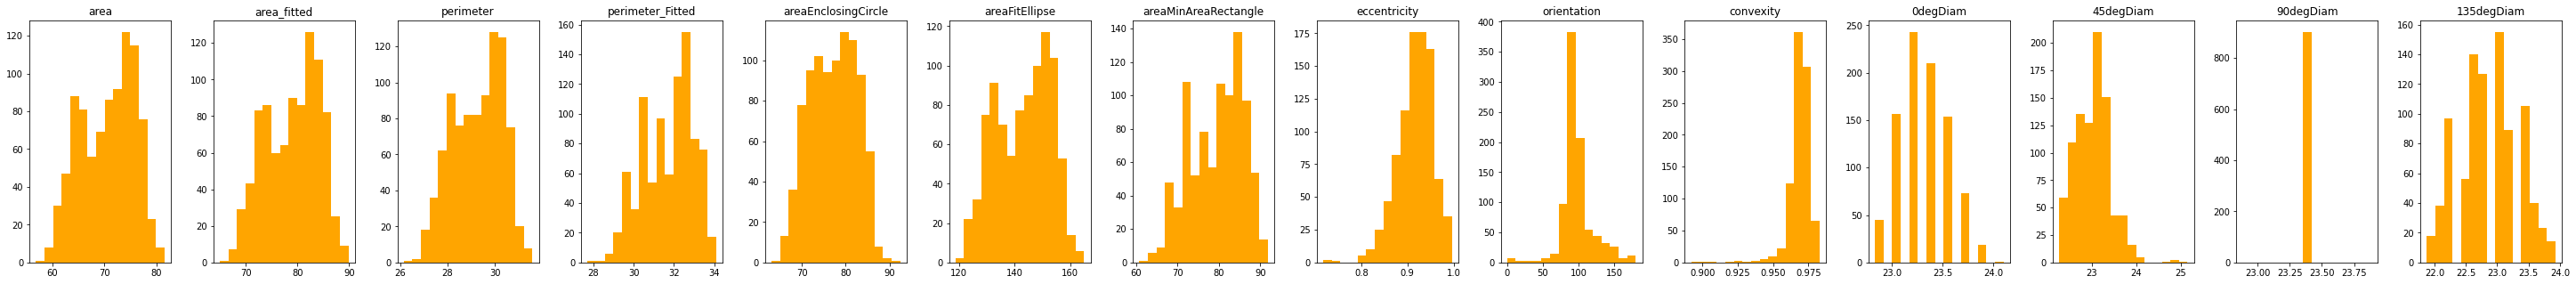

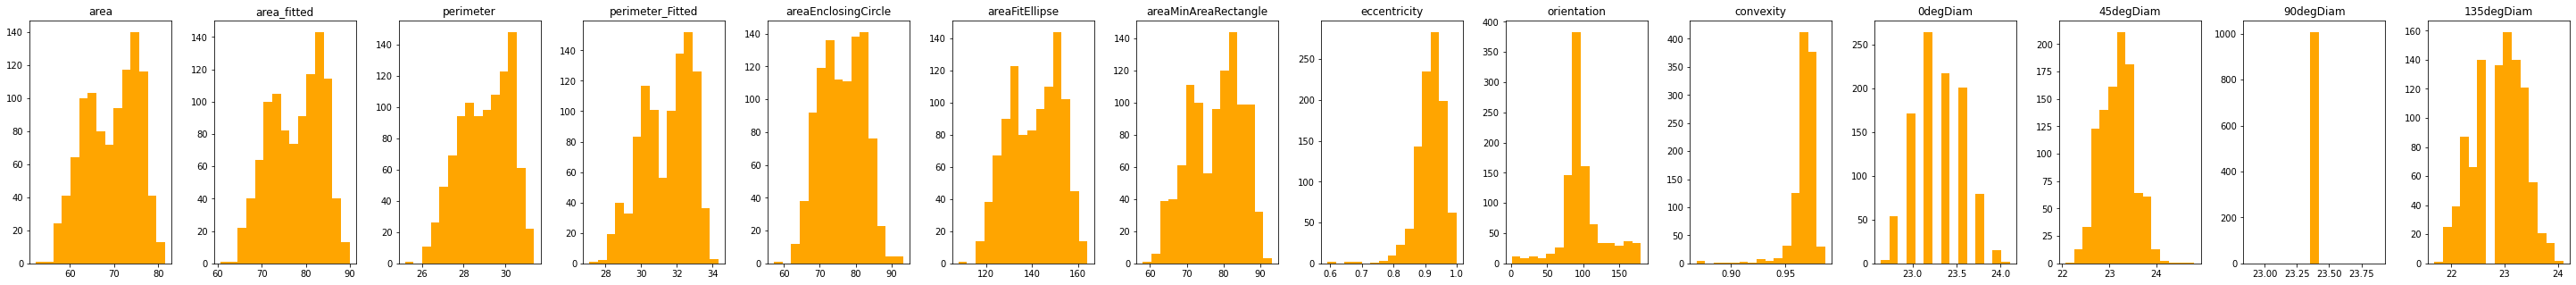

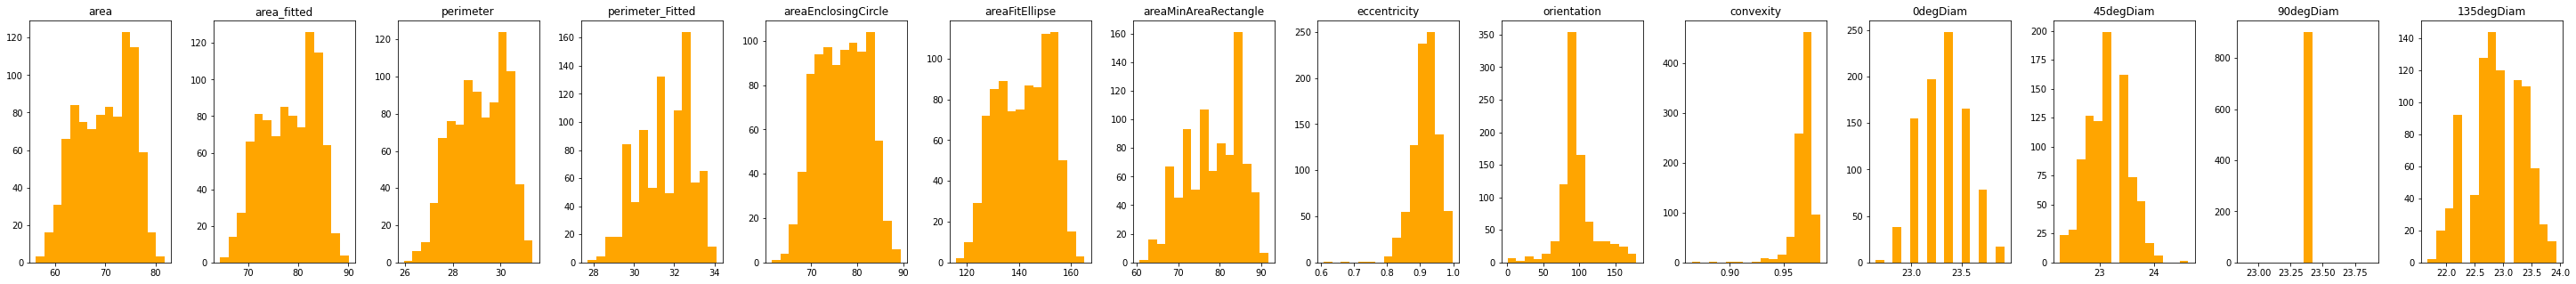

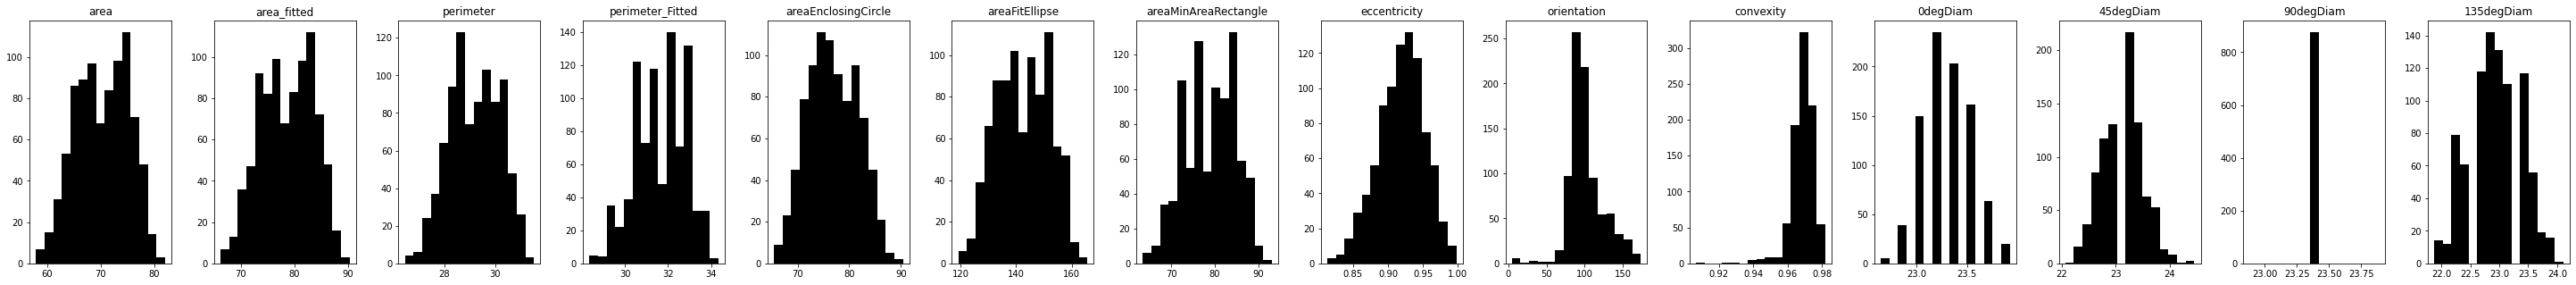

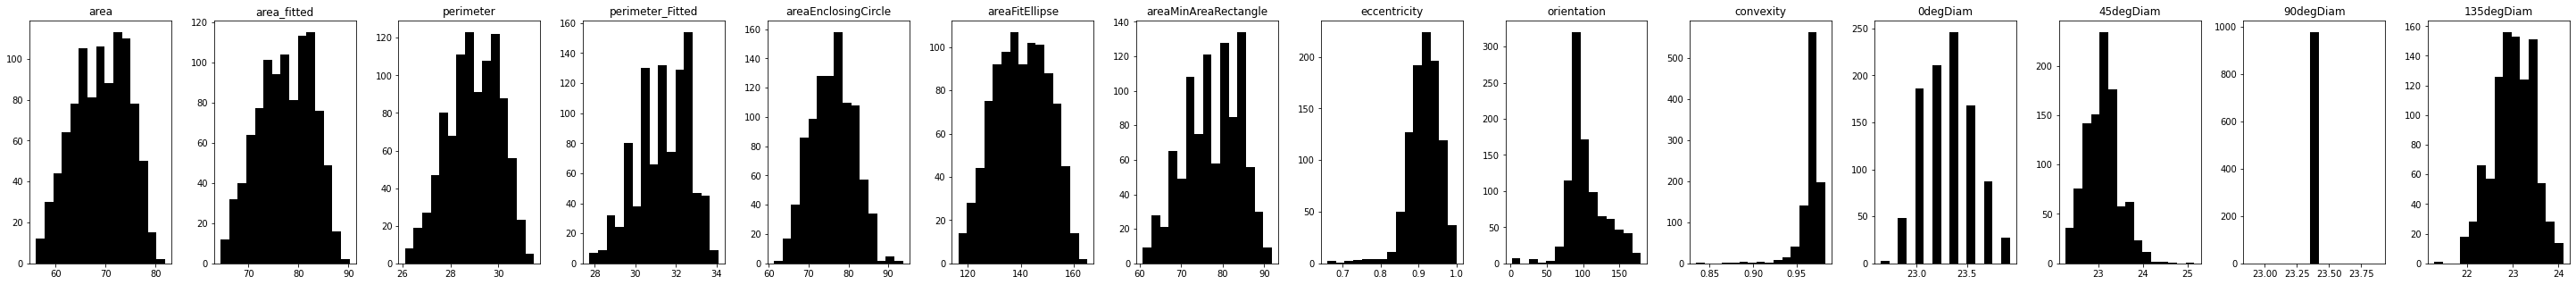

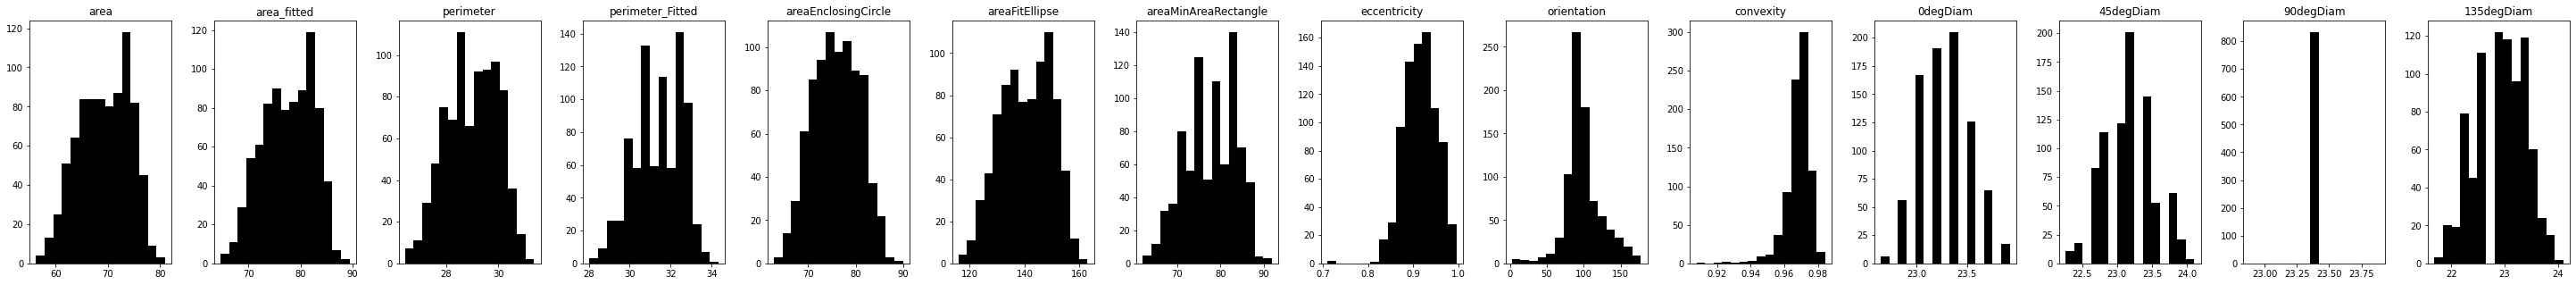

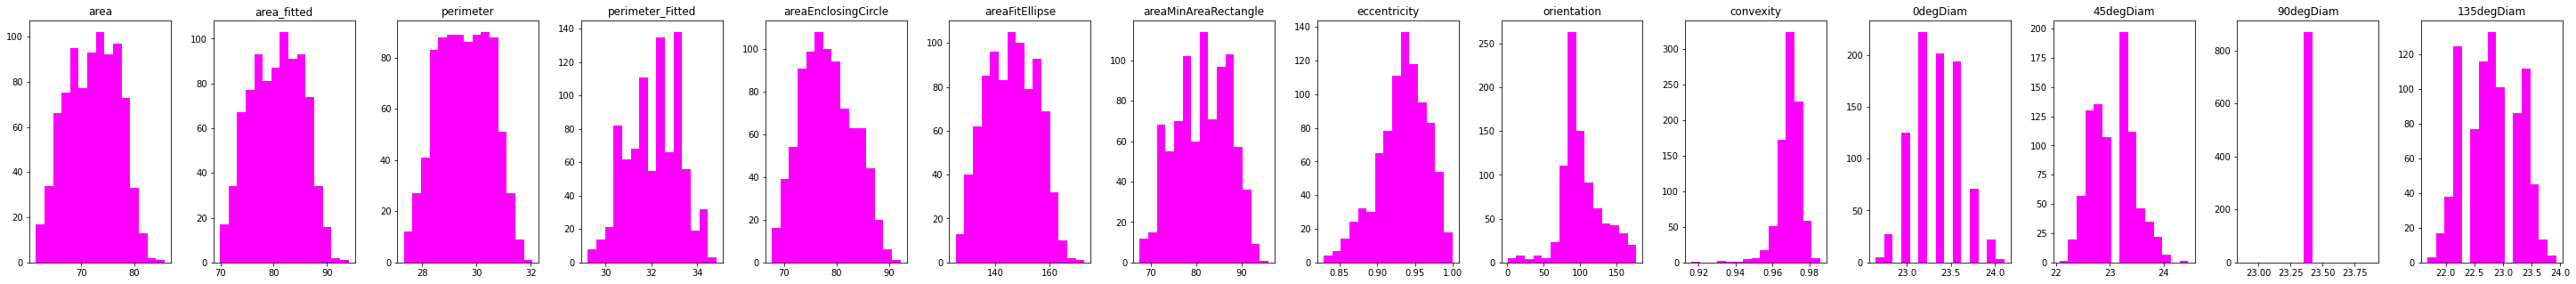

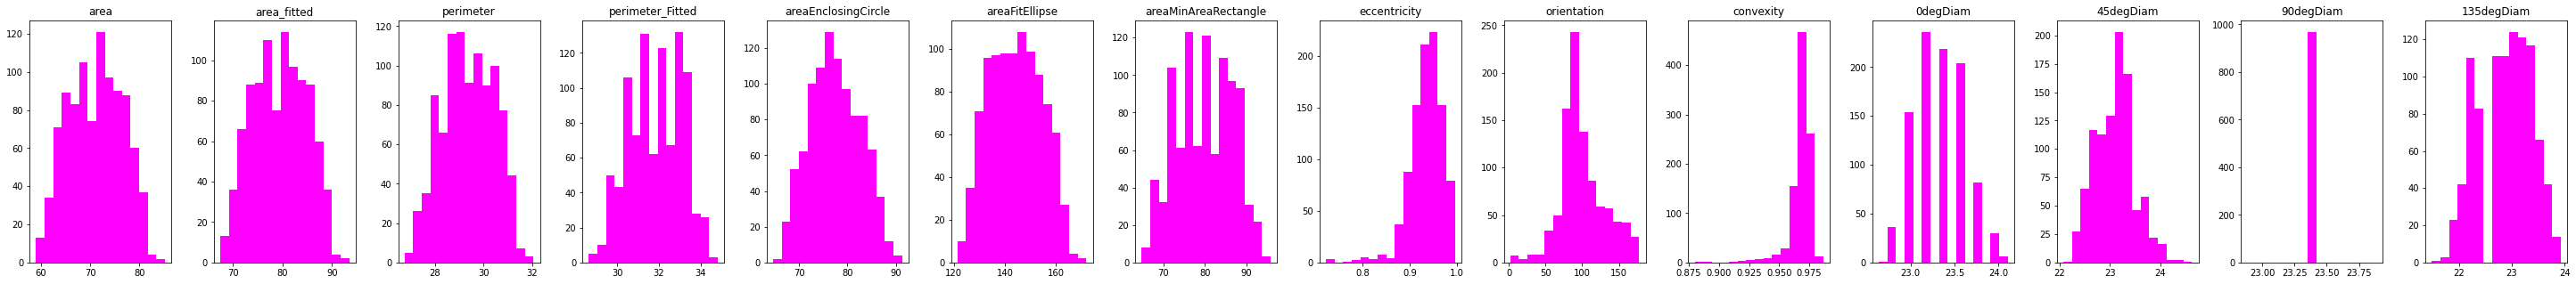

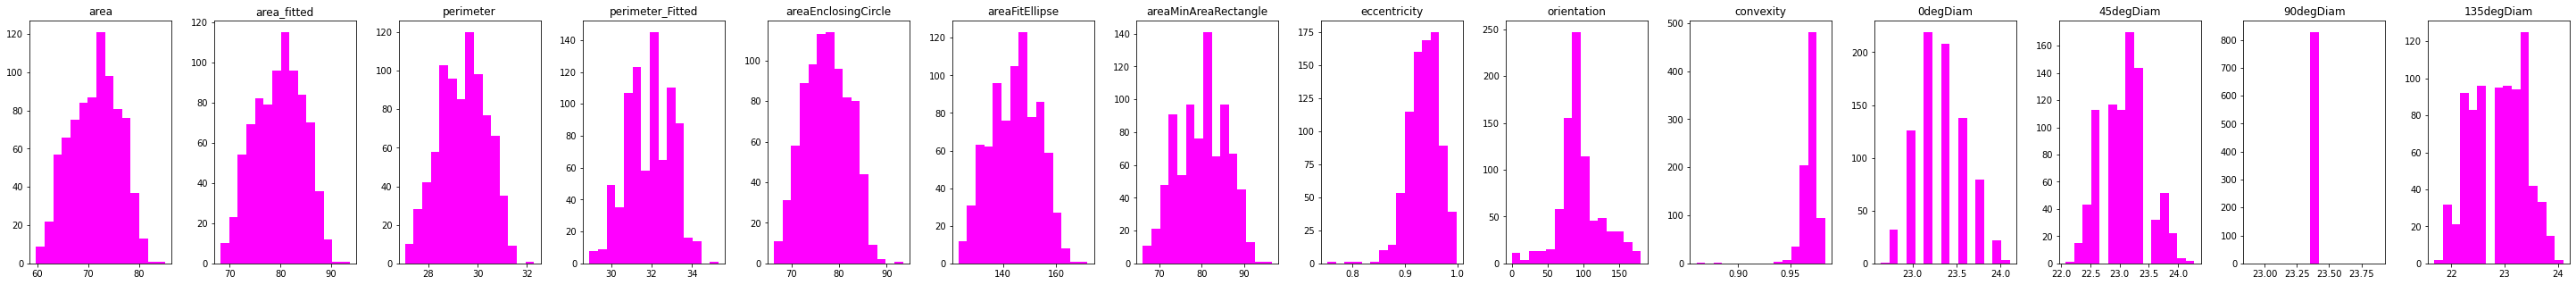

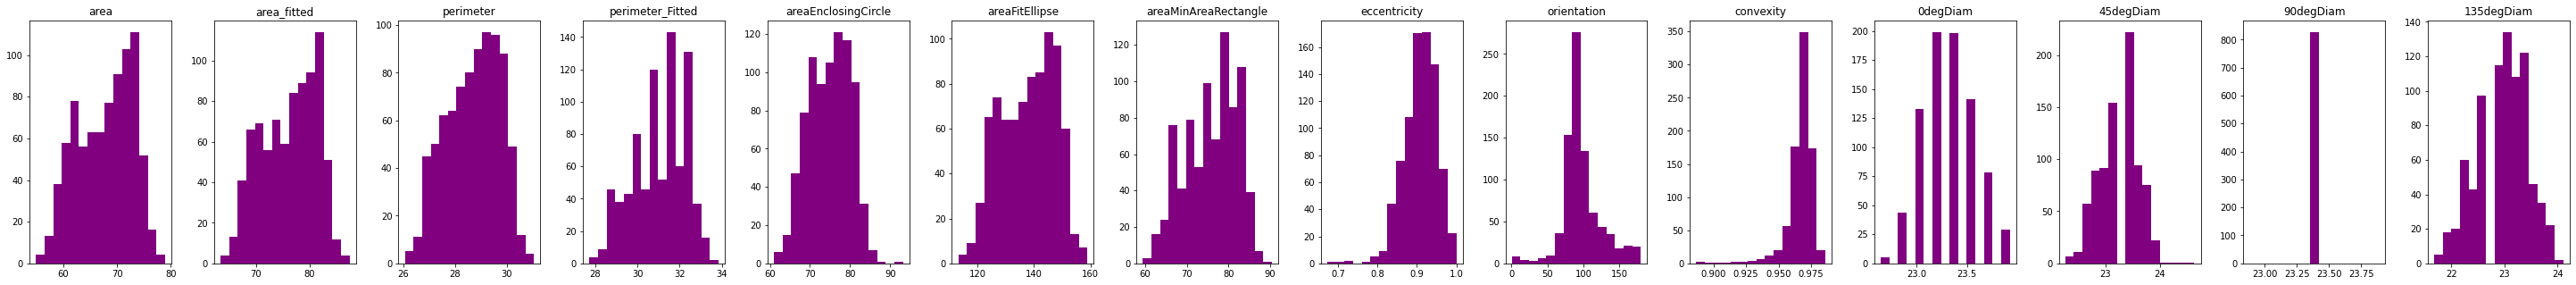

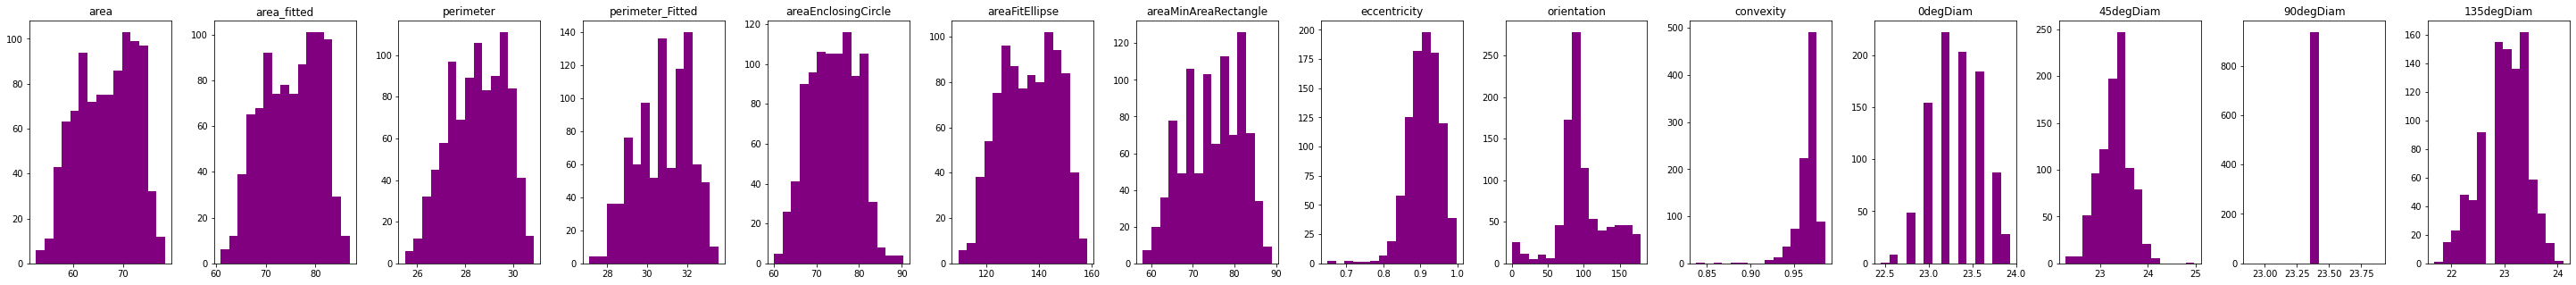

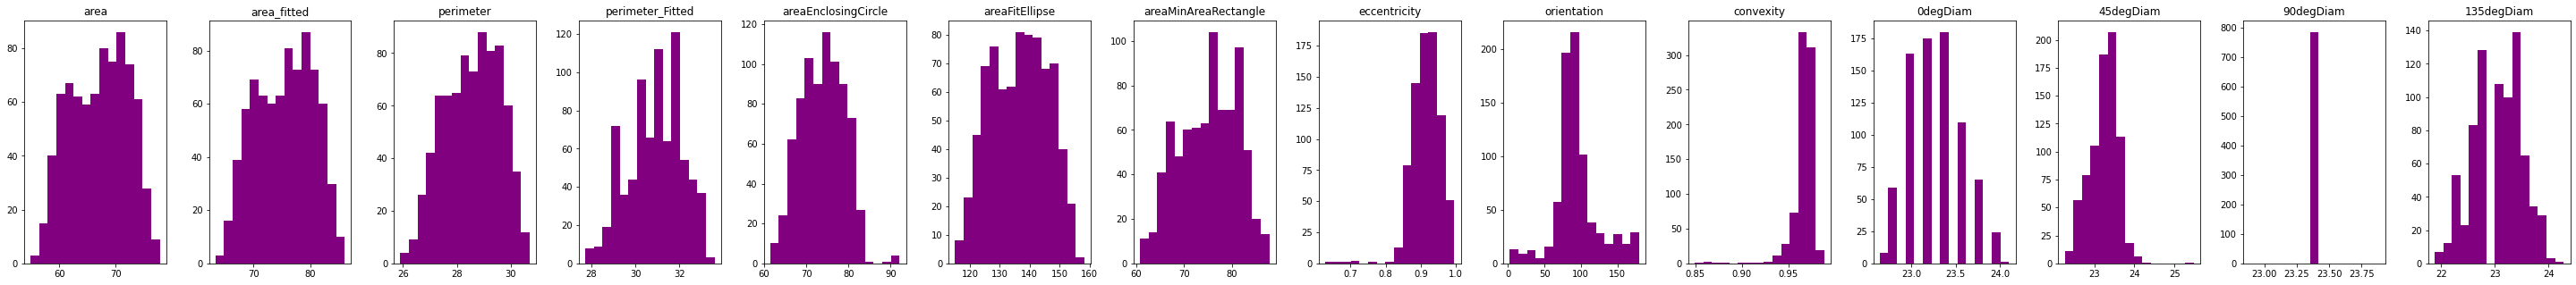

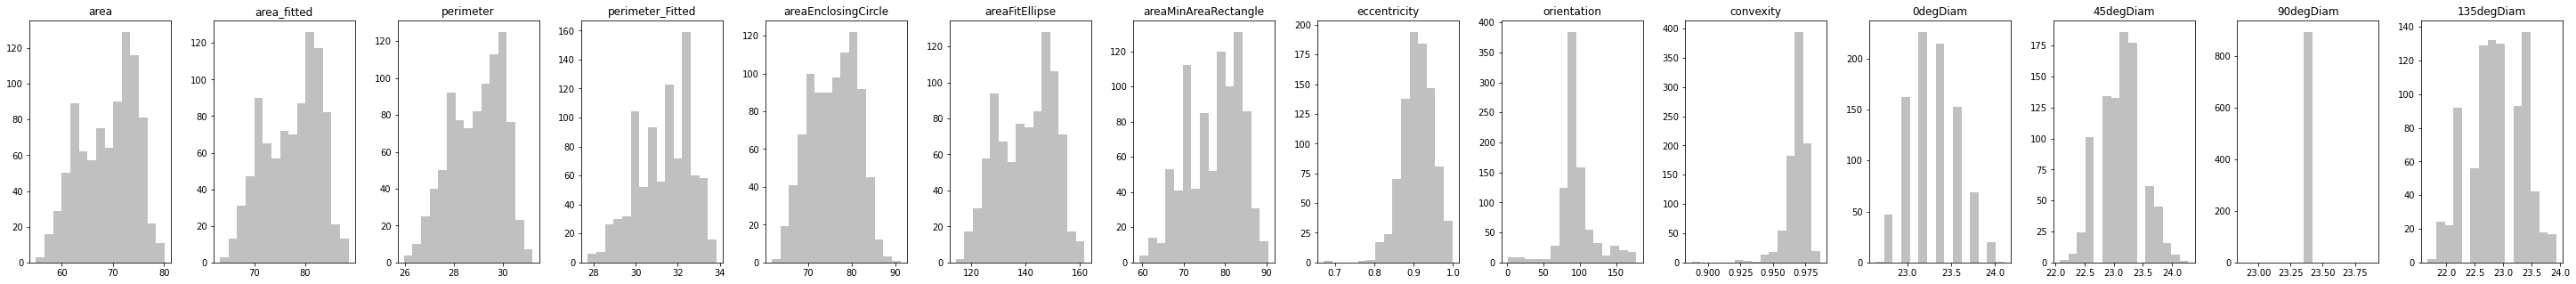

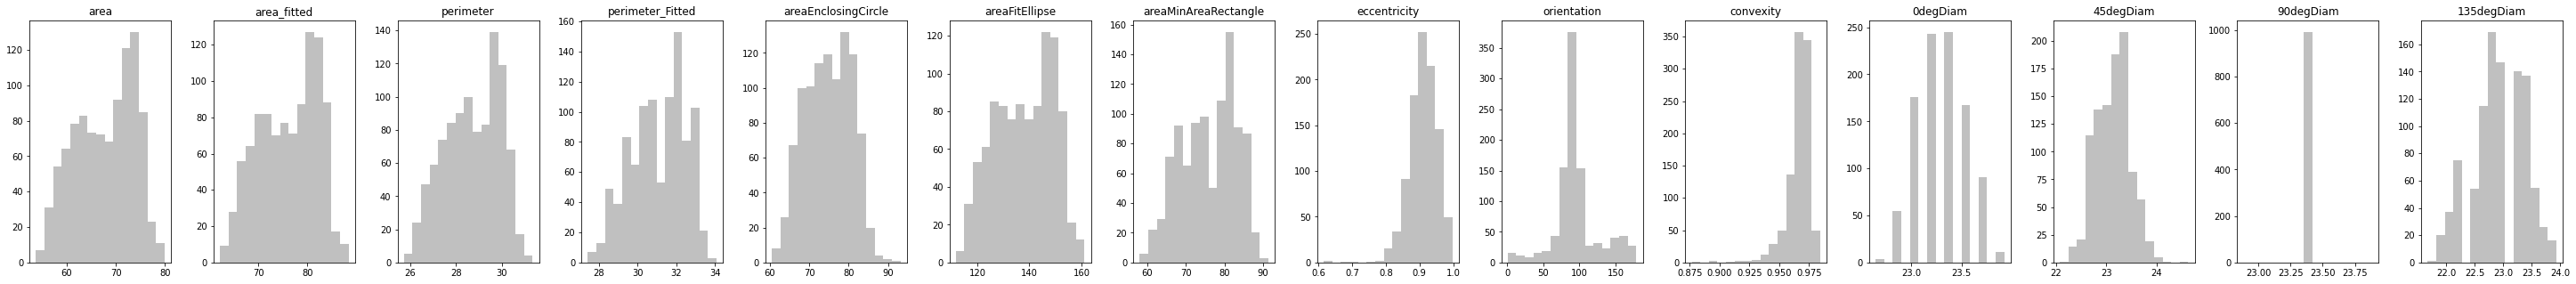

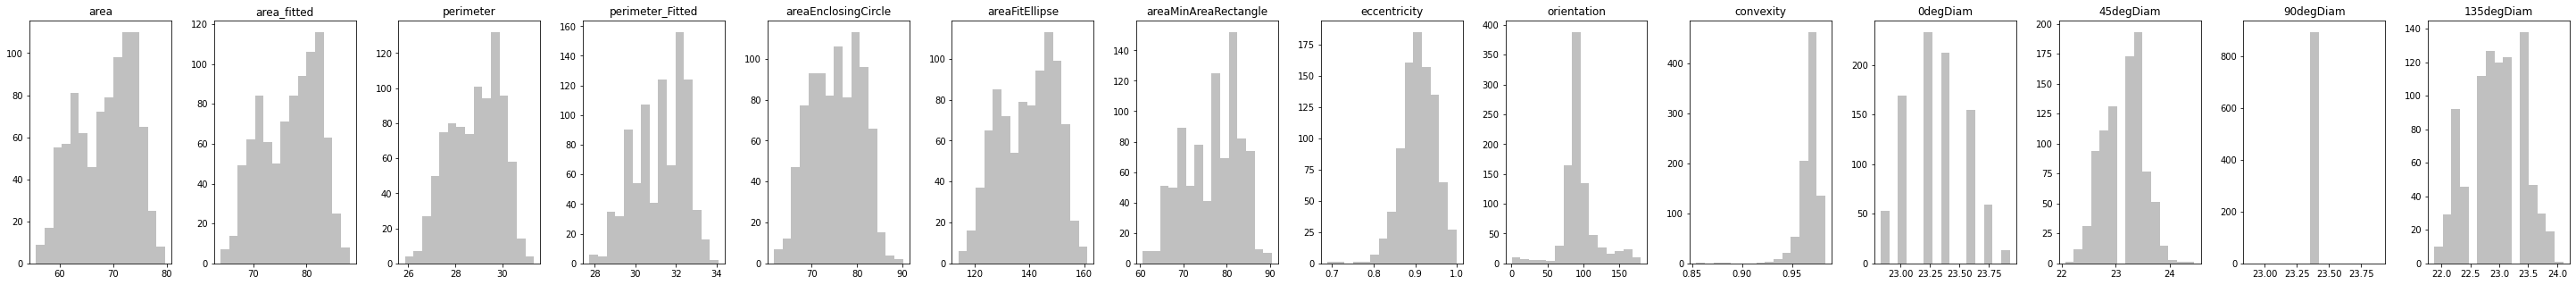

In [17]:
# do the same for enhanced data
for d in range(0, len(dfy[0])):
    for f in range(0, len(dfy)):  
        dff = dfy[f][d].copy(deep=False)
        dff.hist(column=dfl0, 
        bins=15,               
        grid=False,
        figsize=(51, 5),
        layout = (1, len(dfl0)),
        orientation='vertical',
        color=col[d]);

In [11]:
# for the purpose of exploring, let us normalize these dataframes
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        result[feature_name] = df[feature_name]
        if feature_name != 'file_name' and feature_name != 'label' and feature_name != 'location (X_Y)':
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = 100*(df[feature_name] - min_value) / (max_value - min_value)
    return result


for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        #dfx[f][d] = normalize(dfx[f][d])
        dfx[f][d] = dfx[f][d].dropna(axis=1) # some features with constant values result in NaN after scaling and should be removed

#sorting by label
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):        
        dfx[f][d].sort_values(by=['label'], inplace=True)


for f in range(0, len(dfy)):
    for d in range(0, len(dfy[f])):
        #dfy[f][d] = normalize(dfy[f][d])
        dfy[f][d] = dfy[f][d].dropna(axis=1) # some features with constant values result in NaN after scaling and should be removed
        
#sorting by label
for f in range(0, len(dfy)):
    for d in range(0, len(dfy[f])):        
        dfy[f][d].sort_values(by=['label'], inplace=True)

In [12]:
#Let us calculate the mean of each feature in each file and put it in a dataframe
ddfx = copy.deepcopy(dfx)
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        ddfx[f][d] = ddfx[f][d].drop(['file_name', 'label', 'location (X_Y)'], axis=1)
df=[]
for d in range(0, len(ddfx[0])):
    for f in range(0, len(ddfx)):
        answer = ddfx[f][d].mean(axis='index')
        df.append(pd.DataFrame(answer).transpose())    
dfx_mean = pd.concat(df) 


#### The histograms show that there are files (dataframes) with no data and columns with all data being same. Thease may give rise to NaN values when we normalize the data and/or calculate basic statistics such as mean and standard deviation.

#### Next step is to clean up dataframe of basic statistics and get rid of NaN

In [13]:
dfx_mean = dfx_mean.drop(['90degDiam'], axis=1)

In [14]:
dfx_mean = dfx_mean.dropna(axis=0)

In [15]:
#Let us calculate the standard deviation of each feature in each file and put it in a dataframe    
df=[]
for d in range(0, len(ddfx[0])):
    for f in range(0, len(ddfx)):
        answer = ddfx[f][d].std()
        df.append(pd.DataFrame(answer).transpose())    
dfx_std = pd.concat(df) 

In [23]:
dfx_std = dfx_std.drop(['90degDiam'], axis=1)
dfx_std.head(20)

0      area  area_fitted  perimeter  perimeter_Fitted  areaEnclosingCircle  \
0  4.264184     4.268359   0.875902          0.998612             4.265424   
0  4.180378     4.194780   0.876278          1.004506             4.272984   
0  4.195434     4.201591   0.863358          0.997501             4.304998   
0  3.813492     3.806966   0.778844          0.887124             3.797444   
0  3.687480     3.681266   0.754107          0.858683             3.717182   
0  3.849139     3.843093   0.791420          0.902680             3.949796   
0  3.842119     3.836225   0.782403          0.893096             3.762546   
0  3.764797     3.766671   0.778874          0.894525             3.784416   
0  3.569293     3.569905   0.732558          0.860159             3.548496   
0  4.181467     4.171816   0.824854          0.952168             3.930333   
0  4.034063     4.040429   0.827209          0.942879             4.013918   
0  3.945830     3.942498   0.791298          0.909594             3.911647   
0  3.643859     3.640445   0.750422          0.854500             3.904909   
0  3.821007     3.817428   0.783182          0.905698             3.997032   
0  4.239401     4.227375   0.854795          0.997672             4.330445   
0  3.777935     3.784622   0.790687          0.906162             4.063268   
0  4.015190     4.010582   0.821859          0.937864             4.254475   
0  4.008443     4.010225   0.834735          0.954291             4.269513   
0  3.658128     3.657552   0.758799          0.867174             3.843845   
0  3.881709     3.870434   0.790863          0.897244             4.000514   

0  areaFitEllipse  areaMinAreaRectangle  eccentricity  orientation  convexity  \
0        8.417340              4.966493      0.021421    29.021704   0.004941   
0        8.287634              4.968209      0.022722    30.244788   0.004689   
0        8.301263              4.946725      0.024055    29.614770   0.005305   
0        7.569150              4.397333      0.025331    46.283604   0.005692   
0        7.365733              4.222184      0.026113    44.566545   0.005570   
0        7.604673              4.403881      0.028098    42.575633   0.005823   
0        7.623783              4.423113      0.023194    33.791336   0.005345   
0        7.465361              4.397056      0.024626    37.030380   0.005088   
0        7.052405              4.190711      0.022864    38.560533   0.005112   
0        8.239483              4.842093      0.023256    37.491938   0.005637   
0        8.003408              4.733140      0.023287    44.914096   0.004783   
0        7.810120              4.591983      0.024637    41.626771   0.005152   
0        7.265105              4.207594      0.027315    31.530601   0.005258   
0        7.568891              4.422212      0.027731    33.501029   0.005194   
0        8.402467              4.885338      0.024915    35.339874   0.006090   
0        7.489046              4.463545      0.028301    30.074361   0.005015   
0        7.971502              4.619794      0.026934    29.263940   0.005285   
0        7.943799              4.686202      0.029732    33.068628   0.005502   
0        7.294043              4.256921      0.026706    32.725201   0.005288   
0        7.749571              4.416177      0.028513    33.777080   0.006149   

0  0degDiam  45degDiam  135degDiam  
0  0.264961   0.491124    0.392262  
0  0.268540   0.475527    0.381025  
0  0.275702   0.452149    0.395671  
0  0.291707   0.478543    0.432380  
0  0.270773   0.478947    0.458844  
0  0.286116   0.481064    0.448305  
0  0.281682   0.497352    0.393368  
0  0.273636   0.467460    0.394325  
0  0.269960   0.454233    0.385614  
0  0.273776   0.508452    0.380612  
0  0.273075   0.497428    0.382113  
0  0.271099   0.480862    0.410881  
0  0.266975   0.456631    0.419046  
0  0.293495   0.435824    0.400503  
0  0.294709   0.411824    0.376762  
0  0.283277   0.494241    0.409334  
0  0.279989   0.478512    0.40

In [16]:
dfx_std=dfx_std.dropna(axis=0)

In [17]:
#Let us calculate the mean of each feature in each file and put it in a dataframe
ddfy = copy.deepcopy(dfy)
for f in range(0, len(dfx)):
    for d in range(0, len(dfy[f])):
        ddfy[f][d] = ddfy[f][d].drop(['file_name', 'label', 'location (X_Y)'], axis=1)
df=[]
for d in range(0, len(ddfy[0])):
    for f in range(0, len(ddfy)):
        answer = ddfy[f][d].mean(axis='index')
        df.append(pd.DataFrame(answer).transpose())    
dfy_mean = pd.concat(df)  

In [18]:
dfy_mean=dfy_mean.drop(['90degDiam'], axis=1)

In [19]:
dfy_mean = dfy_mean.dropna(axis=0)

In [20]:
#Let us calculate the standard deviation of each feature in each file and put it in a dataframe
df=[]
for d in range(0, len(ddfy[0])):
    for f in range(0, len(ddfy)):
        answer = ddfy[f][d].std()
        df.append(pd.DataFrame(answer).transpose())    
dfy_std = pd.concat(df) 

In [21]:
dfy_std = dfy_std.drop(['90degDiam'], axis=1)

In [22]:
dfy_std = dfy_std.dropna(axis=0)

### Let us plot mean of the feature values of the original data against that of enhanced data

In [23]:
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # For visualling evaluating predictions.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split # For splitting the data.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

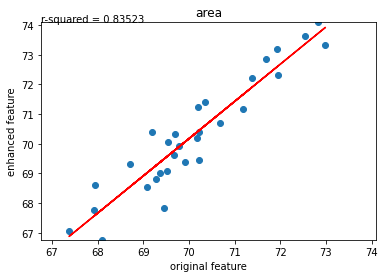

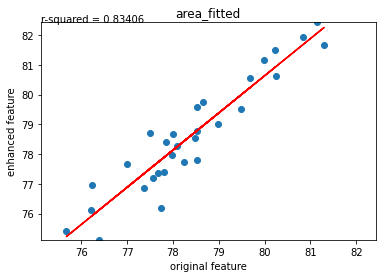

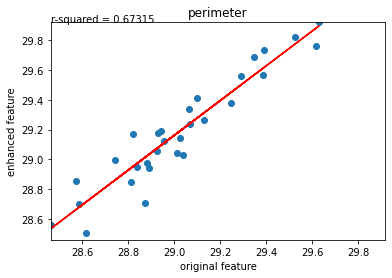

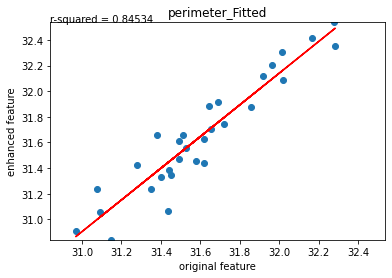

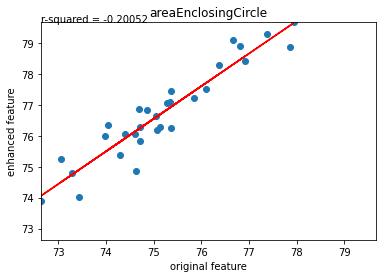

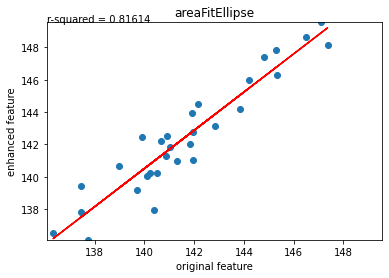

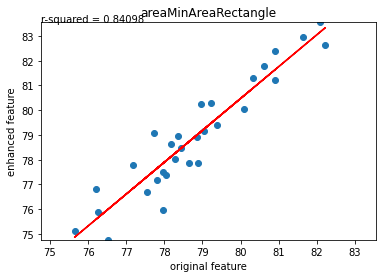

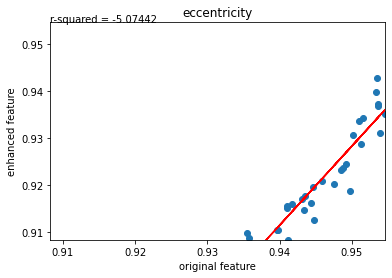

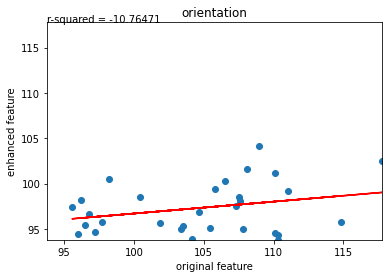

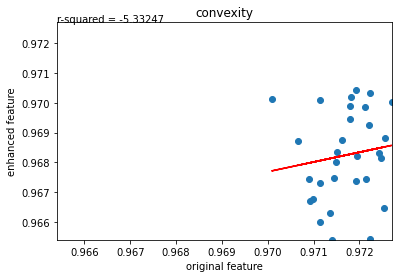

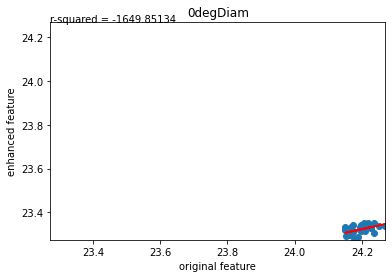

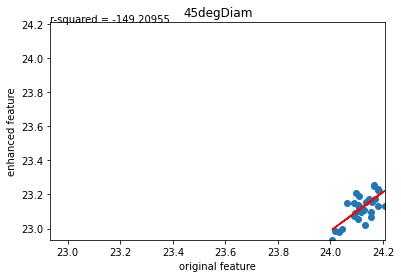

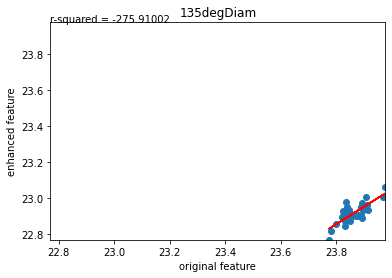

In [24]:

for l1 in dfx_mean.columns:
    for l2 in dfy_mean.columns:
        if l1==l2:
            x = np.array(dfx_mean[l1])
            y = np.array(dfy_mean[l2]) 
            m, b = np.polyfit(x, y, 1)
            xmin = np.min(x)
            ymin = np.min(y)
            rmin=xmin
            if ymin < rmin:
                rmin = ymin
            xmax = np.max(x)
            ymax = np.max(y)
            rmax=xmax
            if ymax > rmax:
                rmax=ymax
            plt.annotate("r-squared = {:.5f}".format(r2_score(y, x)), (rmin, rmax))
            plt.title(l1)
            plt.xlabel('original feature')
            plt.ylabel('enhanced feature')
            plt.xlim(rmin, rmax)
            plt.ylim(rmin, rmax)
            plt.scatter(x, y)
            plt.plot(x, b + m * x, '-', color='red')
            plt.show()


### Let us plot standard deviation of the feature values of the original data against that of enhanced data

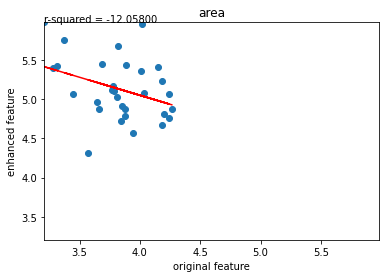

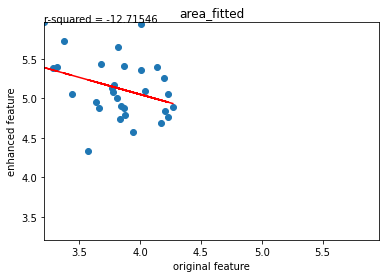

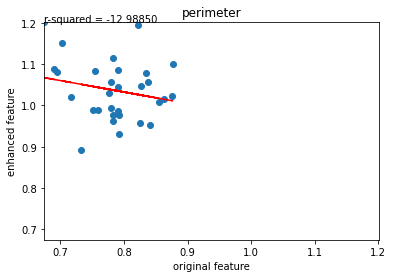

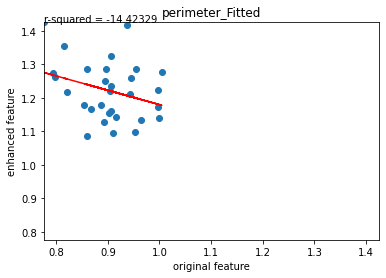

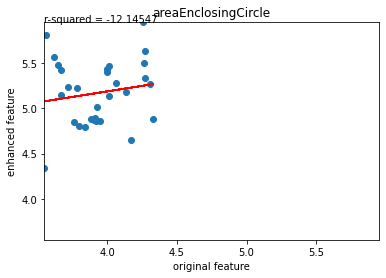

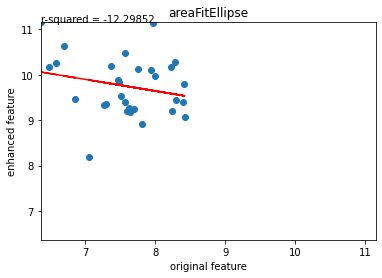

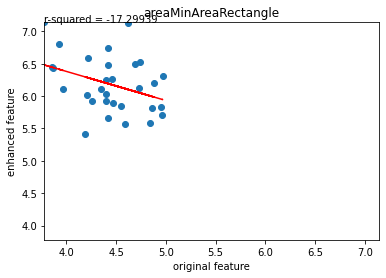

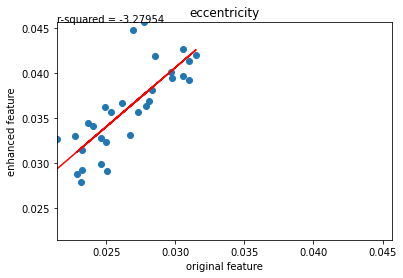

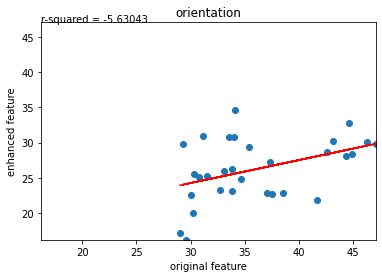

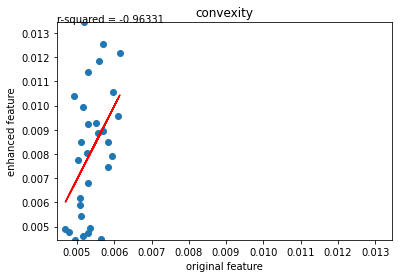

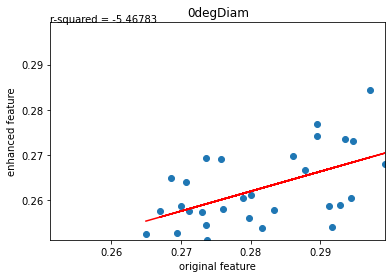

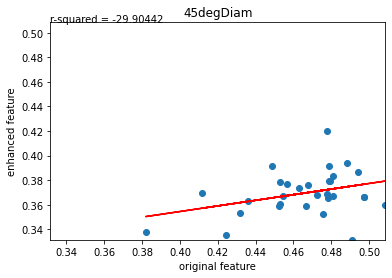

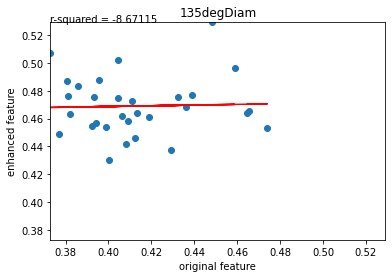

In [25]:
for l1 in dfx_mean.columns:
    for l2 in dfy_mean.columns:
        if l1==l2:
            x = np.array(dfx_std[l1])
            y = np.array(dfy_std[l2])
            m, b = np.polyfit(x, y, 1)
            xmin = np.min(x)
            ymin = np.min(y)
            rmin=xmin
            if ymin < rmin:
                rmin = ymin
            xmax = np.max(x)
            ymax = np.max(y)
            rmax=xmax
            if ymax > rmax:
                rmax=ymax
            plt.annotate("r-squared = {:.5f}".format(r2_score(y, x)), (rmin, rmax))
            plt.title(l1)
            plt.xlabel('original feature')
            plt.ylabel('enhanced feature')
            plt.xlim(rmin, rmax)
            plt.ylim(rmin, rmax)
            plt.scatter(x, y)
            plt.plot(x, b + m * x, '-', color='red')
            plt.show()

#### What is concluded from the above histograms and the scatter plots is
1. Two sets of triplicate data are not read/wrangled properly as their histogram is not correctly displayed
2. One set of triplicates (histogram in RED) does not show unimodal property and this might be an indication of error in feature measurement or bad quality image acquisition. This set should not be used for further analysis.
3. This frequency distribution parameters (mean, sigma) shows that the enhanced data is more closer to normal (Gaussian) distribution. One can conclude from this that the "enhancement" has actually improved the feature clustering to be more tight.
4. Comparison of the mean of the features of original data and enhanced data shows that the mean value of the features has shifted somewhat.
5.Comparison of the standard deviation (spread) of the features of original data and enhanced data shows that often the spread of the features is lower in the enhanced data compared to original data

### 1.5.1 Correlation between features <a id='2.6.1_Find_Your_Resort_Of_Interest'></a>

In [27]:
#Get the list of numerical features
dfl = dfx[0][0].columns
dfl = dfl[3:len(dfl)]


In [28]:
df = copy.deepcopy(dfx[0][0])
df = df.drop(['file_name', 'label', 'location (X_Y)'], axis=1)
df.head()

0         area  area_fitted  perimeter  perimeter_Fitted  areaEnclosingCircle  \
678  64.991983    73.307264  28.066049         30.378472            71.397852   
679  63.915788    72.304382  27.887131         30.378472            69.686151   
680  65.690391    74.001196  28.102961         30.658464            71.247335   
681  68.546042    76.904298  28.740728         31.483503            73.518484   
682  62.821160    71.184894  27.579018         30.095876            68.090892   

0    areaFitEllipse  areaMinAreaRectangle  eccentricity  orientation  \
678      132.243789             72.907767      0.888177   115.534653   
679      128.617442             72.957820      0.917574   161.066010   
680      133.295900             74.296609      0.914020   120.318573   
681      138.441144             77.988508      0.959506   107.403473   
682      126.757304             71.594003      0.958467   145.403610   

0    convexity   0degDiam  45degDiam  90degDiam  135degDiam  
678   0.970638  24.105076  24.456993  24.105076   23.927177  
679   0.969671  24.456993  24.803919  24.105076   24.105076  
680   0.976053  23.747943  24.281672  24.105076   24.631068  
681   0.968397  24.456993  24.456993  24.105076   23.567348  
682   0.971249  24.105076  24.105076  24.105076   24.105076

In [29]:
cr = df.corr()

In [30]:
cr=cr.fillna(0)

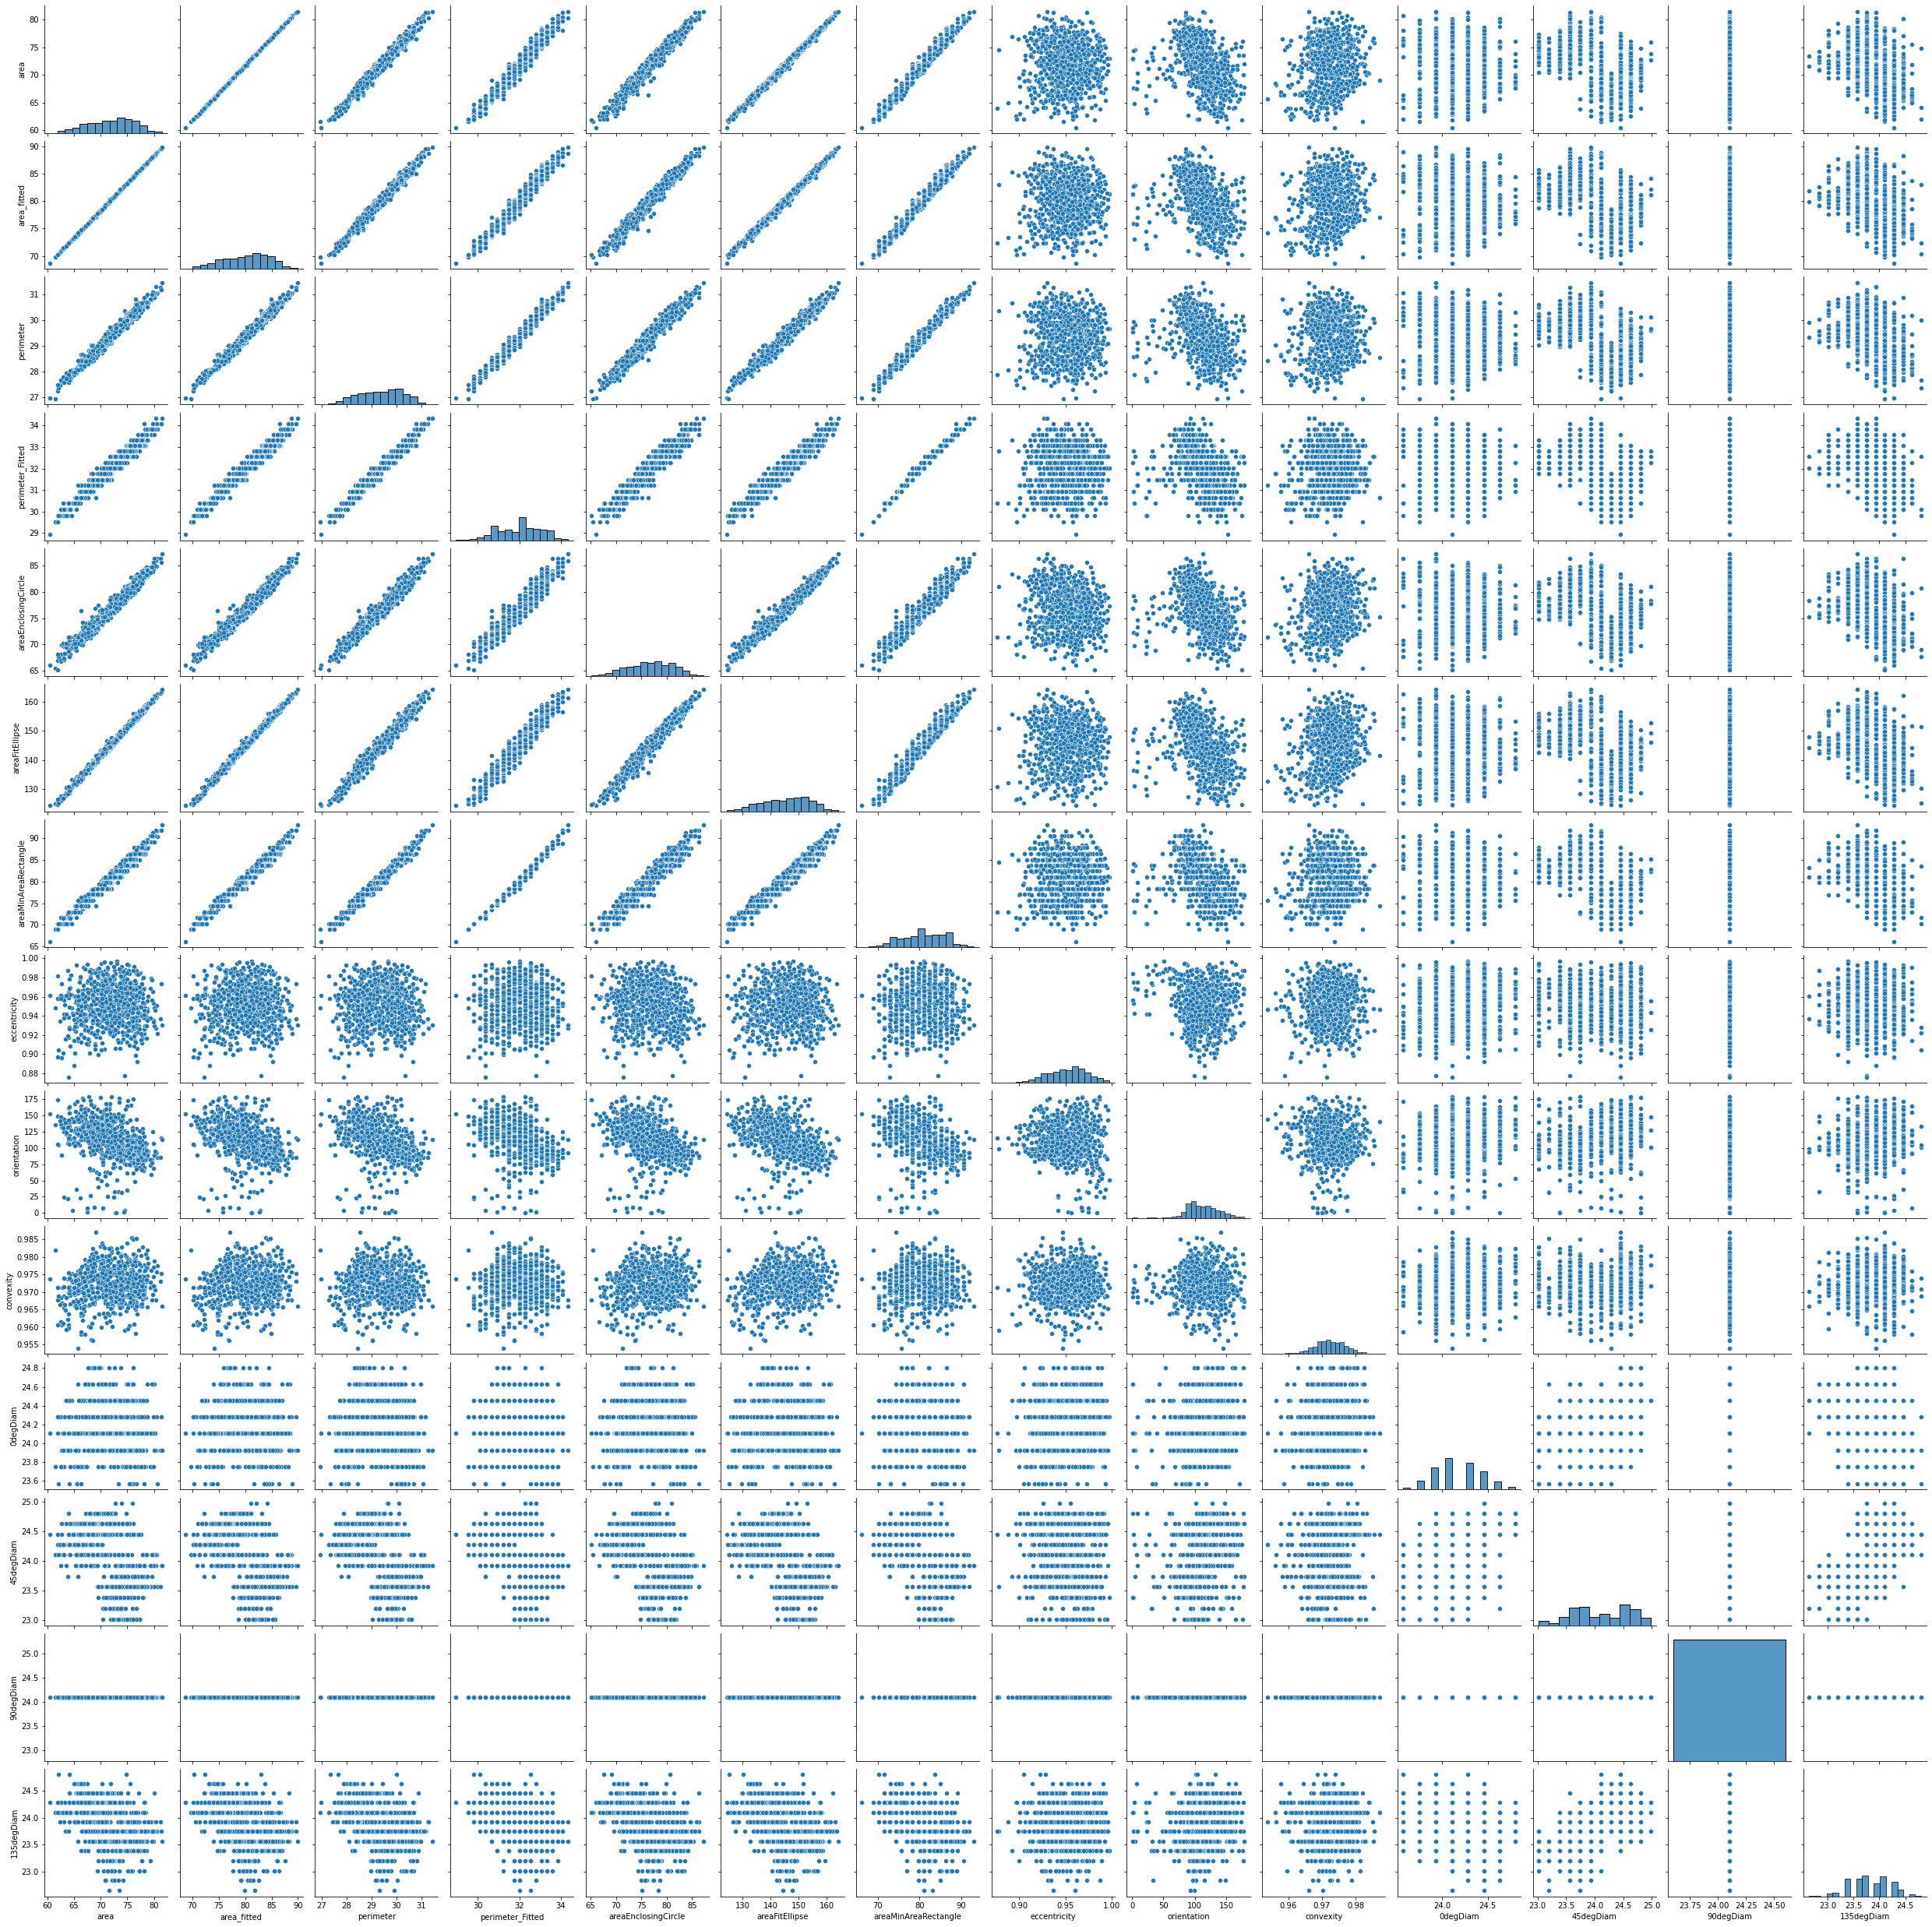

In [31]:
# Call the .pairplot() method on our Seaborn object 'sns', and plug in our df data as a parameter. 
sns.pairplot(df)

<AxesSubplot:xlabel='0', ylabel='0'>

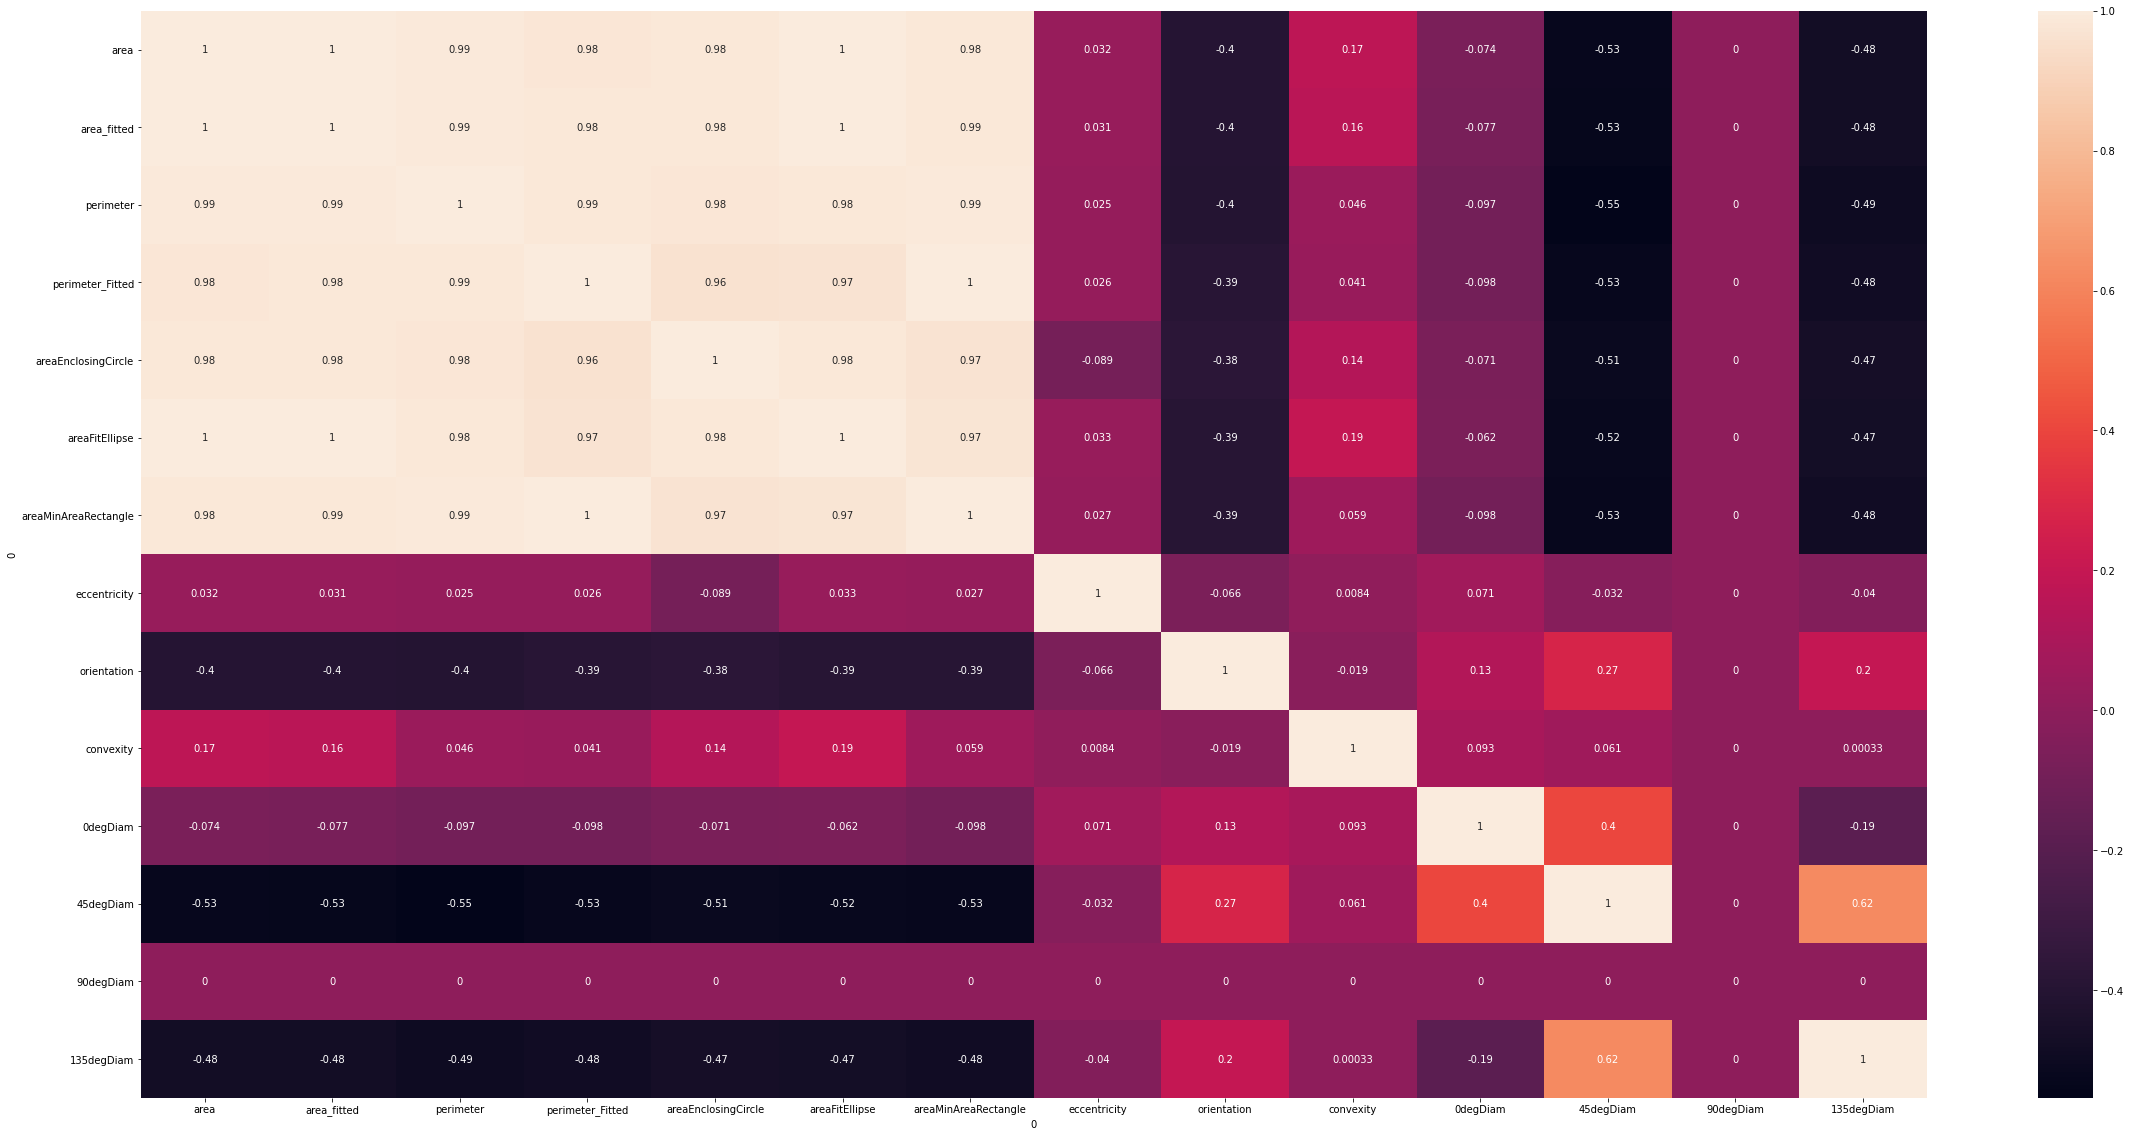

In [32]:
# We need to do some preliminary work, and ensure that the Matplotlib plot is big enough. 
# Call .figure() on plt, and plug in the parameter figsize=(40,20) (or similar suitably large dimensions)
plt.figure(figsize=(40, 20))

# To create an annotated heatmap of the correlations, we call the heatmap() method on our sns object.
# Ensure to plug in, as first parameter, cr, and as second parameter, annot=True (so the graph is annotated)
sns.heatmap(cr, annot=True)

#### Conclusions from the above pairplot, heatmap and the scatter plots of features Vs features from the same class of data

1. Size defining features such as 'area', 'area_fitted', 'perimeter', 'perimeter_Fitted', 'areaEnclosingCircle', 'areaFitEllipse', 'areaMinAreaRectangle'show high correlation i.e. area and the area related features (perimeter, etc.,) show high correlation
2. There is a small but significant trend in relation between 0deg, 45deg and 135deg diameter that implicitely indicate the channel holes are more elliptical than circular
3. Shape defining features such as 'eccentricity', 'orientation', 'convexity', do not correlate with area based features or diameter
4. Feature "90degDiam" has the same value for all channel holes. This shows that there is a bug in the feature engineering code (outside the scope of this work)